<a href="https://colab.research.google.com/github/marwannelsayed/Clima/blob/main/FINAL_ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#READ ME BEFORE RUN



1.   in the content folder create a folder called "Dataset". the path will be /content/Dataset
2.   Add all CSV files into that folder before running anything
3.   Run the code sequenially for correct outputs



# 0.&nbsp;Import libraries


In [ ]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 0.1&nbsp;Import dataSets


In [ ]:
df = pd.read_csv('/content/Dataset/amsterdam_weekdays.csv')
df

Unnamed: 0      realSum        room_type  room_shared  room_private  \
0              0   194.033698     Private room        False          True   
1              1   344.245776     Private room        False          True   
2              2   264.101422     Private room        False          True   
3              3   433.529398     Private room        False          True   
4              4   485.552926     Private room        False          True   
...          ...          ...              ...          ...           ...   
1098        1098  2486.115342  Entire home/apt        False         False   
1099        1099   233.637194     Private room        False          True   
1100        1100   317.062311     Private room        False          True   
1101        1101  1812.855904  Entire home/apt        False         False   
1102        1102   258.008577      Shared room         True         False   

      person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0                 2.0              False      1    0                10.0   
1                 4.0              False      0    0                 8.0   
2                 2.0              False      0    1                 9.0   
3                 4.0              False      0    1                 9.0   
4                 2.0               True      0    0                10.0   
...               ...                ...    ...  ...                 ...   
1098              2.0              False      0    0                10.0   
1099              2.0              False      1    0                10.0   
1100              2.0              False      1    0                10.0   
1101              4.0              False      0    0                 8.0   
1102              2.0              False      0    0                 8.0   

      guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                           93.0         1  5.022964    2.539380   78.690379   
1                           85.0         1  0.488389    0.239404  631.176378   
2                           87.0         1  5.748312    3.651621   75.275877   
3                           90.0         2  0.384862    0.439876  493.272534   
4                           98.0         1  0.544738    0.318693  552.830324   
...                          ...       ...       ...         ...         ...   
1098                       100.0         1  2.375833    1.436054  181.198355   
1099                        90.0         1  4.719736    0.322263  108.024880   
1100                        92.0         1  0.598355    0.751993  440.476515   
1101                        84.0         5  1.943020    0.388532  257.948105   
1102                        90.0         1  0.280204    0.516217  533.962653   

      attr_index_norm  rest_index  rest_index_norm      lng       lat  
0            4.166708   98.253896         6.846473  4.90569  52.41772  
1           33.421209  837.280757        58.342928  4.90005  52.37432  
2            3.985908   95.386955         6.646700  4.97512  52.36103  
3           26.119108  875.033098        60.973565  4.89417  52.37663  
4           29.272733  815.305740        56.811677  4.90051  52.37508  
...               ...         ...              ...      ...       ...  
1098         9.594573  225.304203        15.699521  4.85869  52.37677  
1099         5.719989  134.775277         9.391335  4.83611  52.34910  
1100        23.323524  625.947562        43.616927  4.88897  52.37798  
1101        13.658524  336.589237        23.454022  4.90688  52.35794  
1102        28.273677  807.492307        56.267226  4.89295  52.37575  

[1103 rows x 20 columns]

# 1.&nbsp; Combine DataSets


In [ ]:
folder_path = '/content/Dataset'  # Update to your folder path


In [ ]:
# Initialize an empty list to store DataFrames
dataframes = []

# Iterate through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):  # Ensure it's a CSV file
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)

        # Add extra columns for organization
        df['Country'] = filename.split('_')[0]  # Extract country name from filename
        df['Day_Type'] = 'Weekday' if 'weekday' in filename.lower() else 'Weekend'

        # Append the DataFrame to the list
        dataframes.append(df)

# Combine all DataFrames into one
df = pd.concat(dataframes, ignore_index=True)

# Display the first few rows
df.head(10)


Unnamed: 0     realSum        room_type  room_shared  room_private  \
0           0  250.566814  Entire home/apt        False         False   
1           1  156.604259  Entire home/apt        False         False   
2           2  283.056354  Entire home/apt        False         False   
3           3  301.755370  Entire home/apt        False         False   
4           4  150.760816  Entire home/apt        False         False   
5           5  162.447701     Private room        False          True   
6           6  196.339668  Entire home/apt        False         False   
7           7  107.753079     Private room        False          True   
8           8  196.339668  Entire home/apt        False         False   
9           9  212.233831  Entire home/apt        False         False   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  ...  \
0              3.0               True      1    0                10.0  ...   
1              3.0              False      0    0                10.0  ...   
2              5.0               True      0    1                10.0  ...   
3              4.0               True      0    1                10.0  ...   
4              2.0               True      0    1                10.0  ...   
5              2.0               True      1    0                10.0  ...   
6              3.0               True      0    1                 9.0  ...   
7              2.0              False      0    0                 8.0  ...   
8              4.0               True      0    1                 9.0  ...   
9              2.0               True      1    0                10.0  ...   

       dist  metro_dist  attr_index  attr_index_norm  rest_index  \
0  1.732893    0.212627  118.646831         8.496979  185.096720   
1  4.807912    0.228253   80.145015         5.739643   85.727600   
2  2.811773    0.244163  101.248112         7.250957  151.364288   
3  3.240595    0.610430   92.473938         6.622588  129.863831   
4  2.241146    1.119507  124.256767         8.898738  154.348971   
5  4.611961    0.199926   52.077941         3.729599   75.515542   
6  2.371547    0.452412  125.413625         8.981588  206.644830   
7  3.629103    0.473159   62.459579         4.473088   93.810933   
8  2.301345    0.504318  129.360190         9.264224  217.611746   
9  2.011137    0.679080  145.349381        10.409301  237.989064   

   rest_index_norm       lng       lat  Country  Day_Type  
0         4.424871  16.36500  48.22300   vienna   Weekday  
1         2.049380  16.33356  48.17459   vienna   Weekday  
2         3.618473  16.33600  48.21100   vienna   Weekday  
3         3.104489  16.33006  48.20921   vienna   Weekday  
4         3.689824  16.38867  48.19104   vienna   Weekday  
5         1.805254  16.39755  48.24682   vienna   Weekday  
6         4.939994  16.34236  48.20436   vienna   Weekday  
7         2.242618  16.37837  48.24102   vienna   Weekday  
8         5.202166  16.34340  48.20412   vienna   Weekday  
9         5.689301  16.34682  48.20620   vienna   Weekday  

[10 rows x 22 columns]

# 2 .&nbsp; Data Exploration and visualization

## 2.1&nbsp;Exploration

In [ ]:
df.tail(10)

Unnamed: 0     realSum        room_type  room_shared  room_private  \
51697        1274  274.843414  Entire home/apt        False         False   
51698        1275  212.209031  Entire home/apt        False         False   
51699        1276  231.840703     Private room        False          True   
51700        1277  127.605871     Private room        False          True   
51701        1278  185.566047     Private room        False          True   
51702        1279  232.074413     Private room        False          True   
51703        1280  175.049079  Entire home/apt        False         False   
51704        1281  158.689352  Entire home/apt        False         False   
51705        1282  134.617182     Private room        False          True   
51706        1283  155.417407  Entire home/apt        False         False   

       person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
51697              6.0               True      0    1                10.0   
51698              2.0              False      0    0                 9.0   
51699              2.0              False      0    0                10.0   
51700              2.0              False      0    0                 9.0   
51701              2.0               True      0    0                10.0   
51702              2.0              False      1    0                10.0   
51703              2.0              False      0    0                10.0   
51704              2.0              False      0    0                 9.0   
51705              4.0              False      1    0                10.0   
51706              3.0              False      0    0                 9.0   

       ...       dist  metro_dist  attr_index  attr_index_norm  rest_index  \
51697  ...   6.424254    0.386369   72.910190        11.116602   92.410367   
51698  ...   5.874277    0.995745   95.323915        14.534018  124.659861   
51699  ...   5.878119    0.131624  107.661474        16.415123  166.619594   
51700  ...   5.832919    0.153456  105.867155        16.141543  156.925069   
51701  ...   5.644560    0.260230  111.161420        16.948759  164.430177   
51702  ...   3.482221    0.509602   91.587227        13.964286  122.168375   
51703  ...  11.002848    2.377031   34.425382         5.248831   44.454457   
51704  ...  11.313156    2.531878   33.429196         5.096943   43.200491   
51705  ...  15.166191    2.754843   25.439056         3.878688   33.027075   
51706  ...  22.617451   13.314108   16.600735         2.531111   21.455803   

       rest_index_norm       lng       lat  Country  Day_Type  
51697        19.054385  13.39000  52.46800   berlin   Weekday  
51698        25.704010  13.36332  52.48180   berlin   Weekday  
51699        34.355819  13.34903  52.49035   berlin   Weekday  
51700        32.356875  13.35218  52.48870   berlin   Weekday  
51701        33.904377  13.35400  52.49000   berlin   Weekday  
51702        25.190282  13.45614  52.50351   berlin   Weekday  
51703         9.166205  13.50477  52.44047   berlin   Weekday  
51704         8.907645  13.51031  52.43937   berlin   Weekday  
51705         6.809957  13.53301  52.40712   berlin   Weekday  
51706         4.424040  13.70702  52.42405   berlin   Weekday  

[10 rows x 22 columns]

In [ ]:
df.sample(5)

Unnamed: 0     realSum        room_type  room_shared  room_private  \
41845        2340  324.354553  Entire home/apt        False         False   
730           730  160.110324  Entire home/apt        False         False   
15288        4084  314.212470  Entire home/apt        False         False   
3444         1706  168.564281  Entire home/apt        False         False   
12143         939  154.519156     Private room        False          True   

       person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
41845              4.0               True      0    0                10.0   
730                4.0              False      1    0                10.0   
15288              3.0              False      0    0                 9.0   
3444               4.0              False      1    0                10.0   
12143              2.0               True      1    0                10.0   

       ...      dist  metro_dist  attr_index  attr_index_norm  rest_index  \
41845  ...  2.726901    0.386738  224.186778        10.901098  581.963803   
730    ...  5.643020    0.601785   42.998314         3.079355   63.191488   
15288  ...  3.325811    0.566617  311.118973        21.627093  562.740986   
3444   ...  4.318402    0.712367  225.663998         4.999686  628.242746   
12143  ...  7.843822    0.772579  145.601397        10.121321  325.468306   

       rest_index_norm       lng       lat  Country  Day_Type  
41845        26.847347   2.38441  48.84372    paris   Weekend  
730           1.510638  16.43568  48.23784   vienna   Weekday  
15288        10.072083  -0.11909  51.47890   london   Weekend  
3444         13.687885  12.49039  41.86302     rome   Weekend  
12143         5.825316  -0.20171  51.45519   london   Weekend  

[5 rows x 22 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   room_type                   51707 non-null  object 
 3   room_shared                 51707 non-null  bool   
 4   room_private                51707 non-null  bool   
 5   person_capacity             51707 non-null  float64
 6   host_is_superhost           51707 non-null  bool   
 7   multi                       51707 non-null  int64  
 8   biz                         51707 non-null  int64  
 9   cleanliness_rating          51707 non-null  float64
 10  guest_satisfaction_overall  51707 non-null  float64
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_dist                  517

In [ ]:
df.dtypes

Unnamed: 0                      int64
realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
Country                        object
Day_Type                       object
dtype: object

In [ ]:
df.describe()

Unnamed: 0       realSum  person_capacity         multi  \
count  51707.000000  51707.000000     51707.000000  51707.000000   
mean    1620.502388    279.879591         3.161661      0.291353   
std     1217.380366    327.948386         1.298545      0.454390   
min        0.000000     34.779339         2.000000      0.000000   
25%      646.000000    148.752174         2.000000      0.000000   
50%     1334.000000    211.343089         3.000000      0.000000   
75%     2382.000000    319.694287         4.000000      1.000000   
max     5378.000000  18545.450285         6.000000      1.000000   

                biz  cleanliness_rating  guest_satisfaction_overall  \
count  51707.000000        51707.000000                51707.000000   
mean       0.350204            9.390624                   92.628232   
std        0.477038            0.954868                    8.945531   
min        0.000000            2.000000                   20.000000   
25%        0.000000            9.000000                   90.000000   
50%        0.000000           10.000000                   95.000000   
75%        1.000000           10.000000                   99.000000   
max        1.000000           10.000000                  100.000000   

          bedrooms          dist    metro_dist    attr_index  attr_index_norm  \
count  51707.00000  51707.000000  51707.000000  51707.000000     51707.000000   
mean       1.15876      3.191285      0.681540    294.204105        13.423792   
std        0.62741      2.393803      0.858023    224.754123         9.807985   
min        0.00000      0.015045      0.002301     15.152201         0.926301   
25%        1.00000      1.453142      0.248480    136.797385         6.380926   
50%        1.00000      2.613538      0.413269    234.331748        11.468305   
75%        1.00000      4.263077      0.737840    385.756381        17.415082   
max       10.00000     25.284557     14.273577   4513.563486       100.000000   

         rest_index  rest_index_norm           lng           lat  
count  51707.000000     51707.000000  51707.000000  51707.000000  
mean     626.856696        22.786177      7.426068     45.671128  
std      497.920226        17.804096      9.799725      5.249263  
min       19.576924         0.592757     -9.226340     37.953000  
25%      250.854114         8.751480     -0.072500     41.399510  
50%      522.052783        17.542238      4.873000     47.506690  
75%      832.628988        32.964603     13.518825     51.471885  
max     6696.156772       100.000000     23.786020     52.641410

In [ ]:
df['room_type'].value_counts()

room_type
Entire home/apt    32648
Private room       18693
Shared room          366
Name: count, dtype: int64

## 2.2&nbsp; Visualization

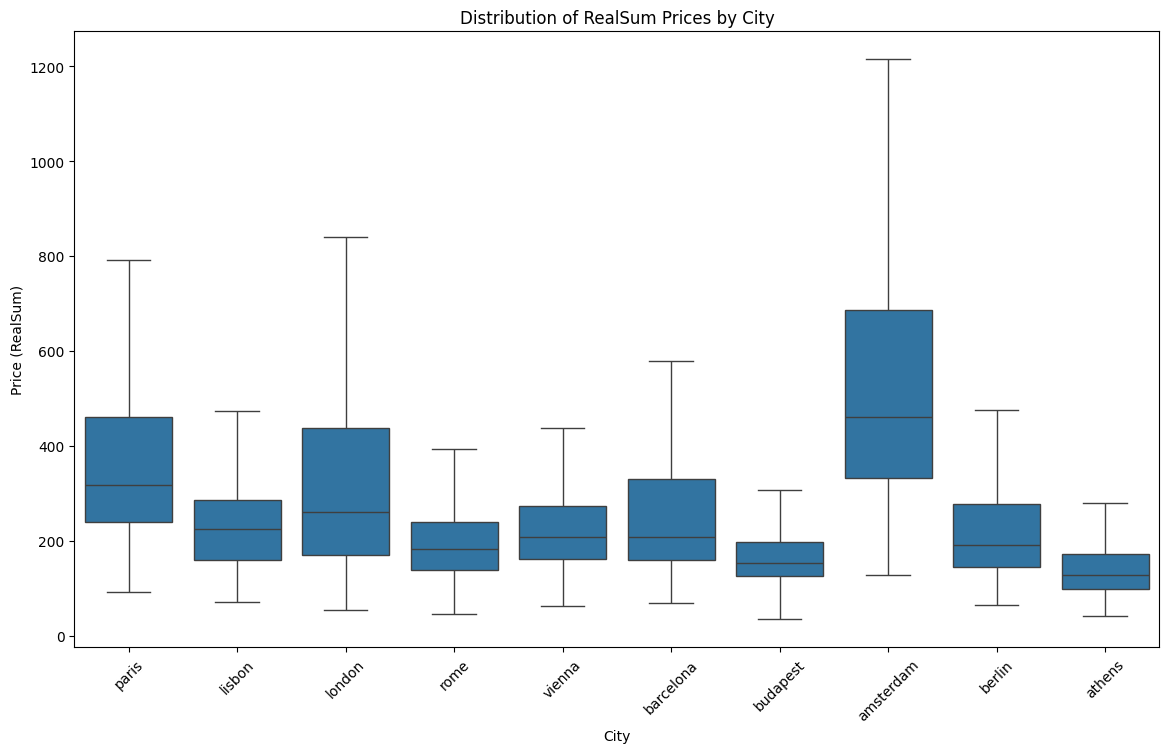

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of `realSum` by city
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Country', y='realSum', showfliers=False)  # Hides outliers for clarity
plt.title('Distribution of RealSum Prices by City')
plt.xlabel('City')
plt.ylabel('Price (RealSum)')
plt.xticks(rotation=45)  # Rotate city names for better readability
plt.show()


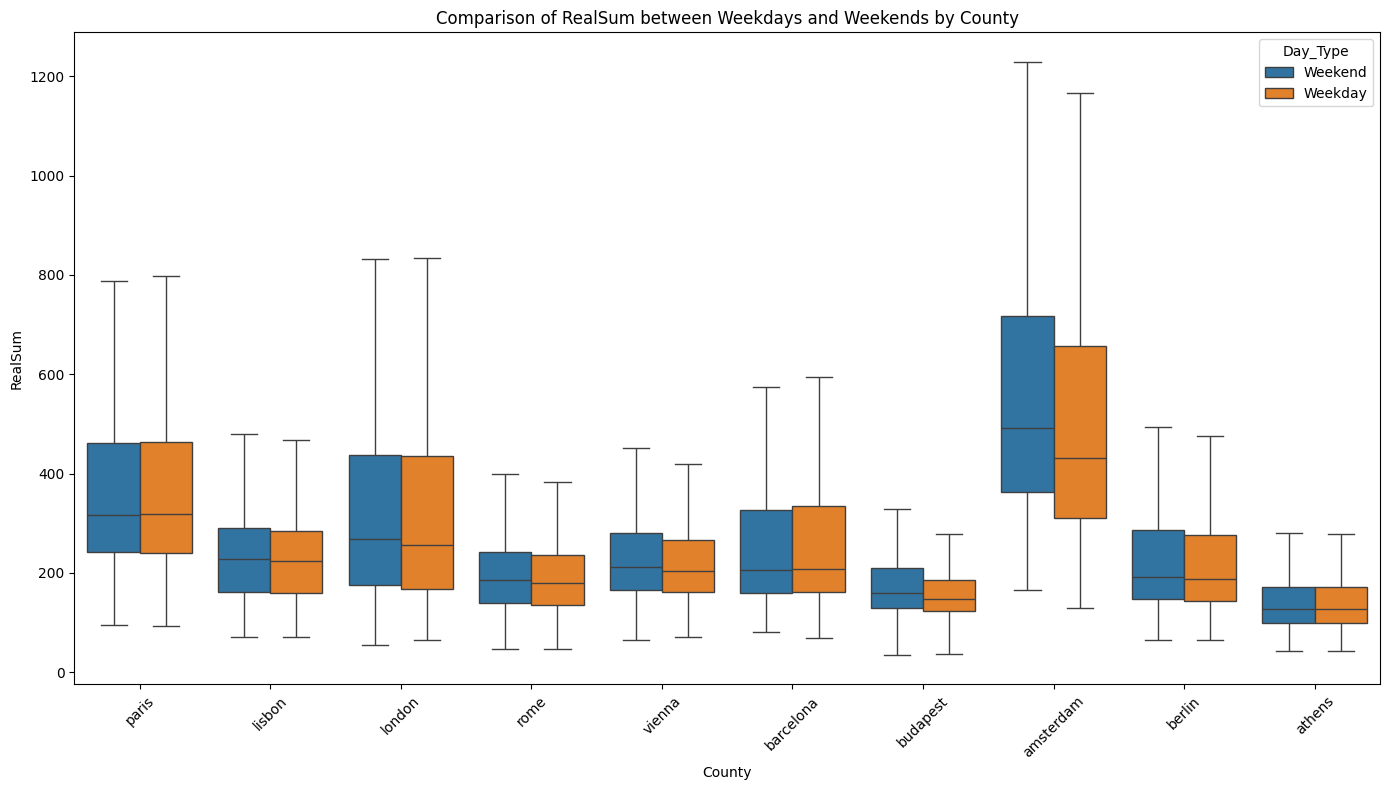

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot comparing 'realSum' for weekdays vs weekends across different counties
plt.figure(figsize=(14, 8))

sns.boxplot(x='Country', y='realSum', hue='Day_Type', data=df, showfliers=False)

# Add titles and labels
plt.title('Comparison of RealSum between Weekdays and Weekends by County')
plt.xlabel('County')
plt.ylabel('RealSum')
plt.xticks(rotation=45)  # Rotate the x labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


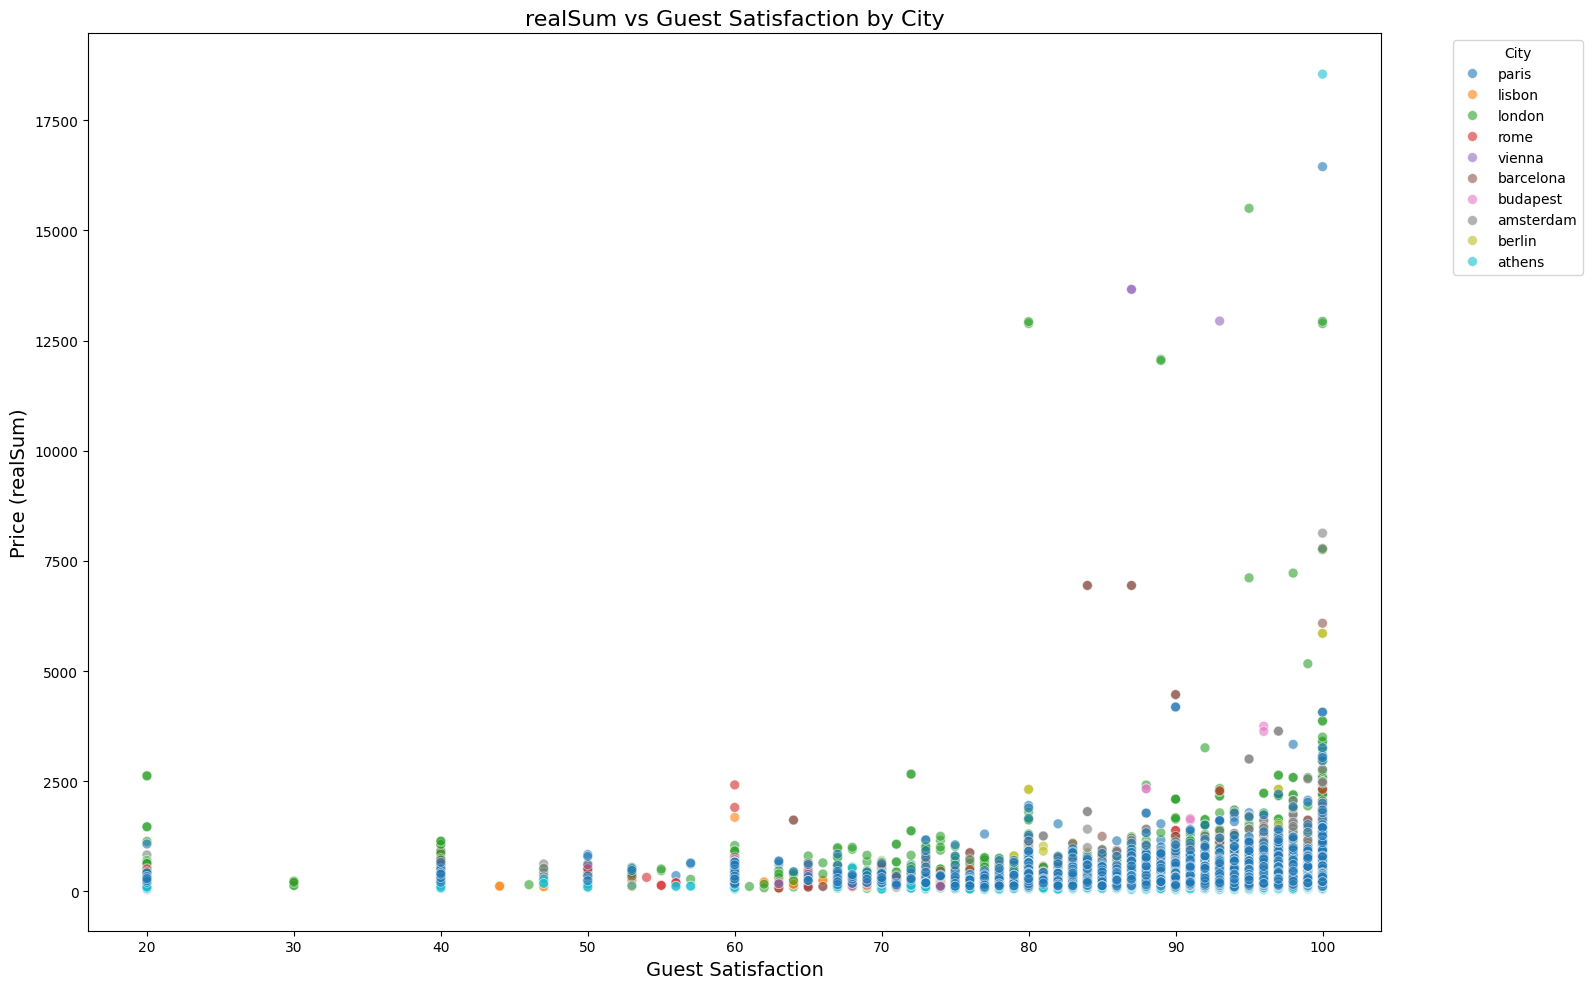

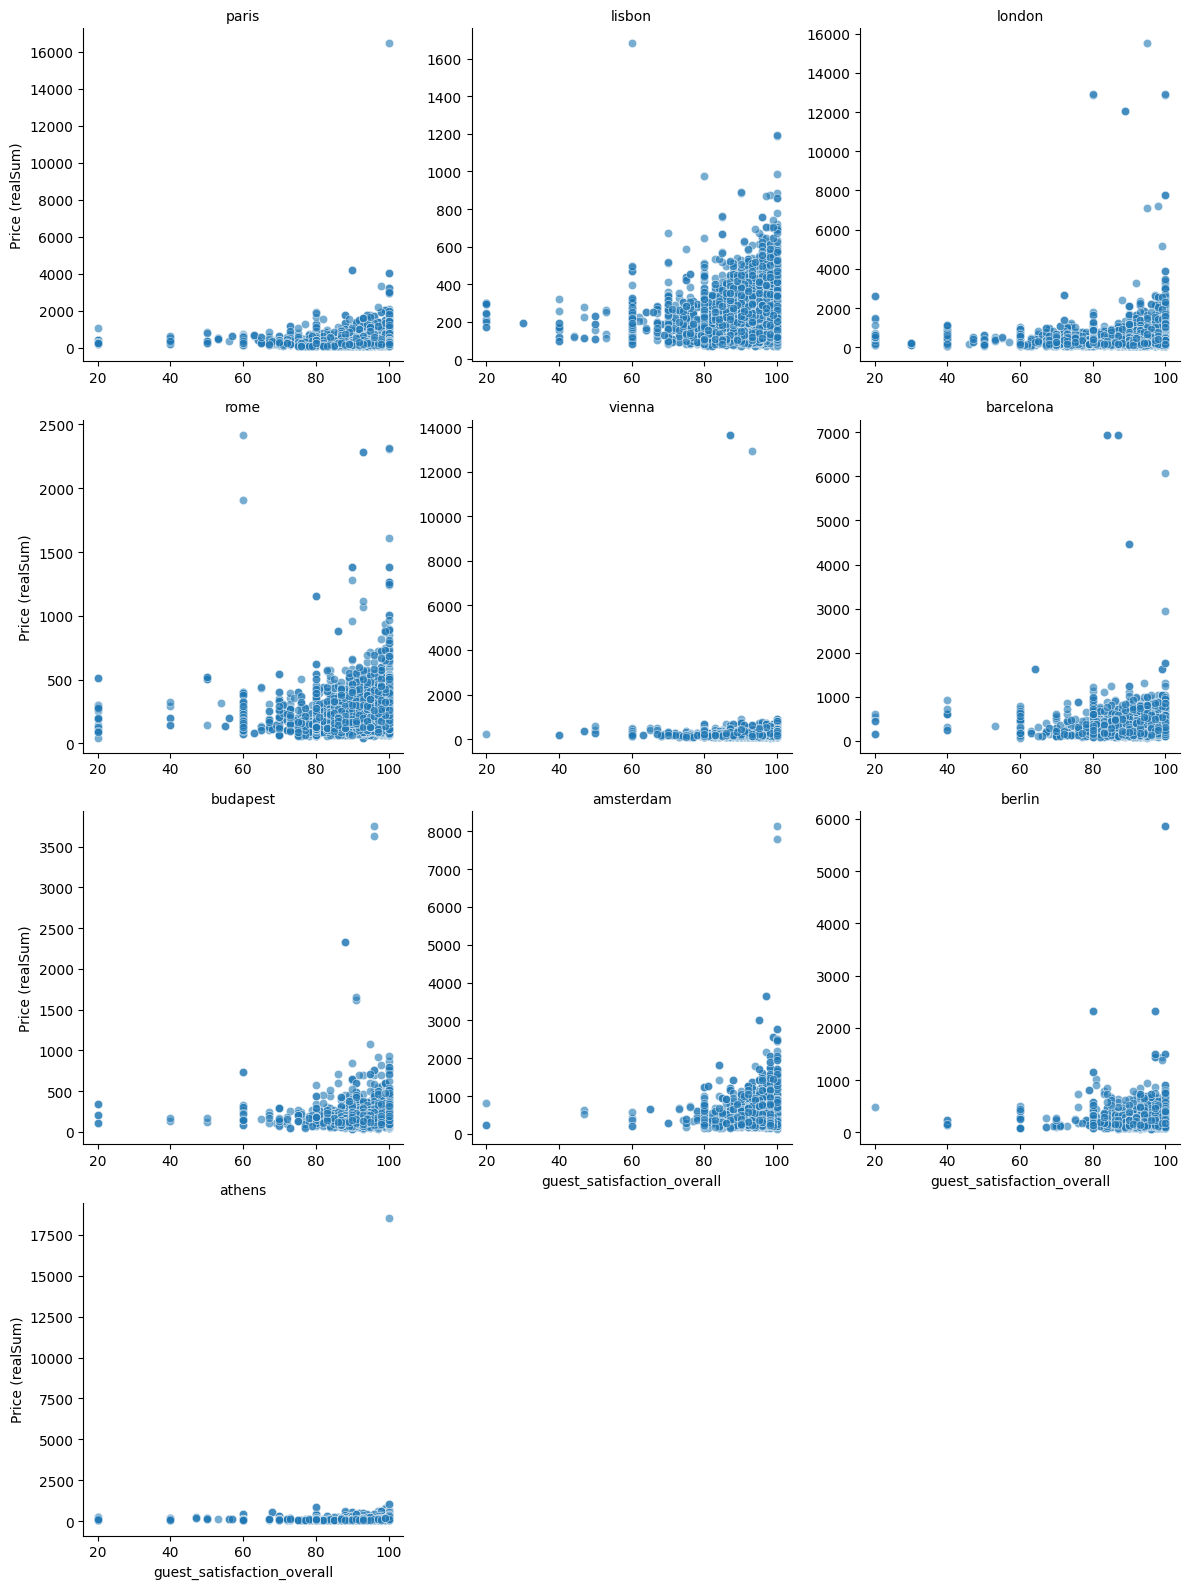

In [ ]:
    # Scatter Plot with Adjustments
    plt.figure(figsize=(16, 10))  # Increased figure size
    sns.scatterplot(
        data=df,
        x='guest_satisfaction_overall',
        y='realSum',
        hue='Country',
        alpha=0.6,  # Increase transparency for less overlap
        s=50  # Adjust marker size
    )
    plt.title('realSum vs Guest Satisfaction by City', fontsize=16)
    plt.xlabel('Guest Satisfaction', fontsize=14)
    plt.ylabel('Price (realSum)', fontsize=14)
    plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Optional: Facet Grid for Each City
    g = sns.FacetGrid(df, col="Country", col_wrap=3, height=4, sharex=False, sharey=False)
    g.map_dataframe(sns.scatterplot, x="guest_satisfaction_overall", y="realSum", alpha=0.6)
    g.set_axis_labels("guest_satisfaction_overall", "Price (realSum)")
    g.set_titles(col_template="{col_name}")
    g.tight_layout()
    plt.show()



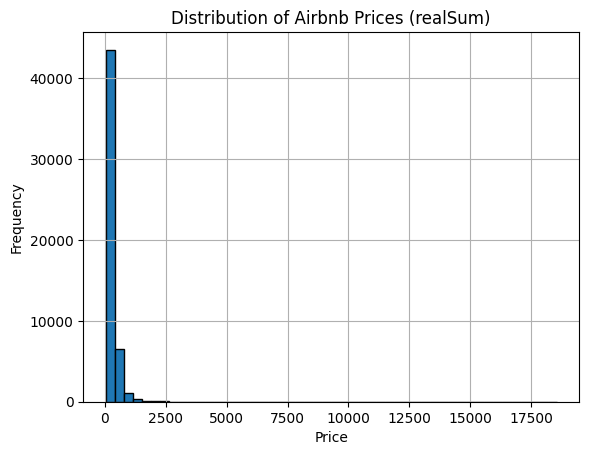

In [ ]:
df['realSum'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Airbnb Prices (realSum)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



* Skewed Distribution:

The majority of prices are concentrated on the left side of the graph (lower prices), with a long tail stretching toward higher prices. This indicates that the data is highly right-skewed, which is common for pricing data.
*   Outliers

There are extremely high prices (e.g., greater than $2500 and up to  17500) that significantly extend the range, making the majority of data points appear compressed.


*   Frequency:

Most listings have prices below $500, as seen from the high bar density on the left side of the chart.






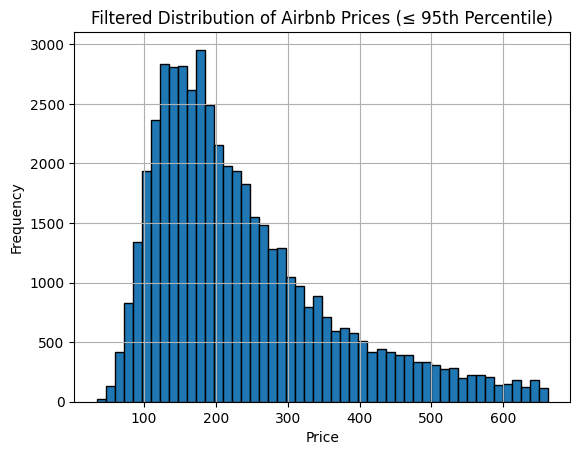

In [ ]:
import matplotlib.pyplot as plt

# Assuming `df` is your dataset
threshold = df['realSum'].quantile(0.95)  # 95th percentile
filtered_data = df[df['realSum'] <= threshold]

# Plot the histogram
filtered_data['realSum'].hist(bins=50, edgecolor='black')
plt.title('Filtered Distribution of Airbnb Prices (≤ 95th Percentile)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


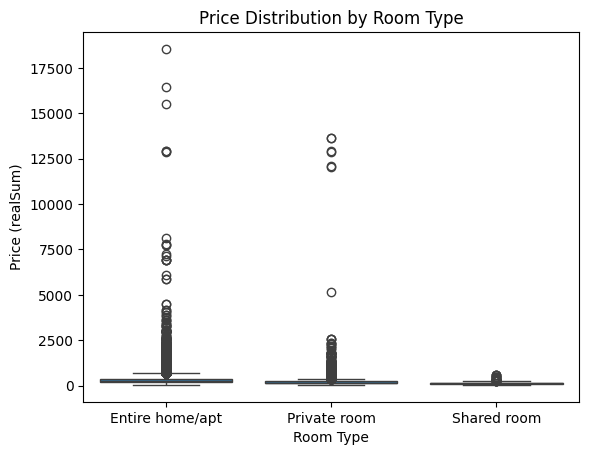

In [ ]:
import seaborn as sns

sns.boxplot(x='room_type', y='realSum', data=df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price (realSum)')
plt.show()


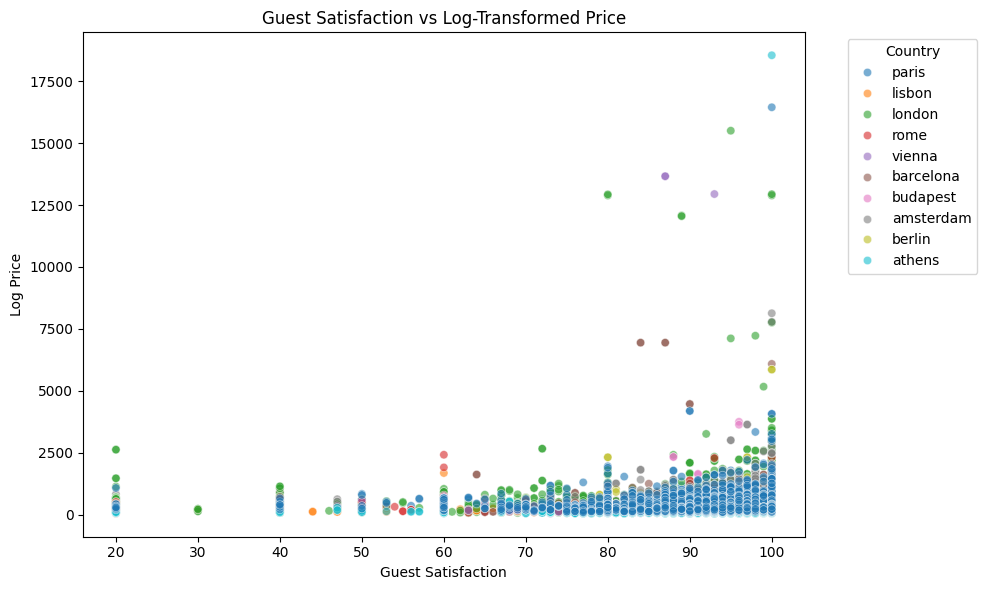

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='guest_satisfaction_overall',
    y='realSum',
    hue='Country',
    alpha=0.6
)
plt.title('Guest Satisfaction vs Log-Transformed Price')
plt.xlabel('Guest Satisfaction')
plt.ylabel('Log Price')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


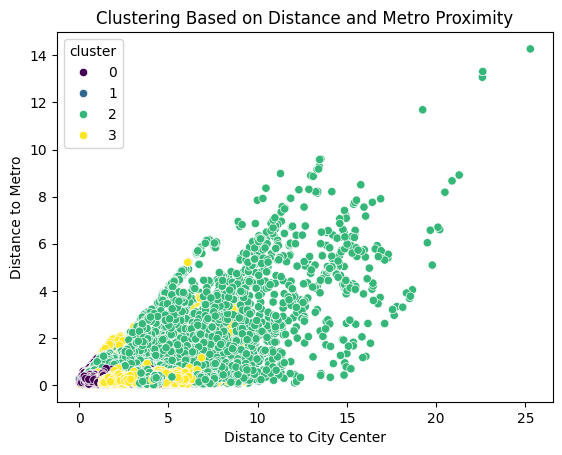

            realSum  guest_satisfaction_overall  cleanliness_rating
cluster                                                            
0        435.338244                   90.991105            9.236102
1        637.855172                   92.205692            9.364812
2        205.261970                   93.290316            9.468605
3        293.627547                   92.498323            9.359736


In [ ]:
from sklearn.cluster import KMeans

# Select clustering features
clustering_features = df[['metro_dist', 'dist', 'attr_index_norm']]
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(clustering_features)

# Scatter plot with clusters
sns.scatterplot(data=df, x='dist', y='metro_dist', hue='cluster', palette='viridis')
plt.title('Clustering Based on Distance and Metro Proximity')
plt.xlabel('Distance to City Center')
plt.ylabel('Distance to Metro')
plt.show()

cluster_summary = df.groupby('cluster')[['realSum', 'guest_satisfaction_overall', 'cleanliness_rating']].mean()
print(cluster_summary)


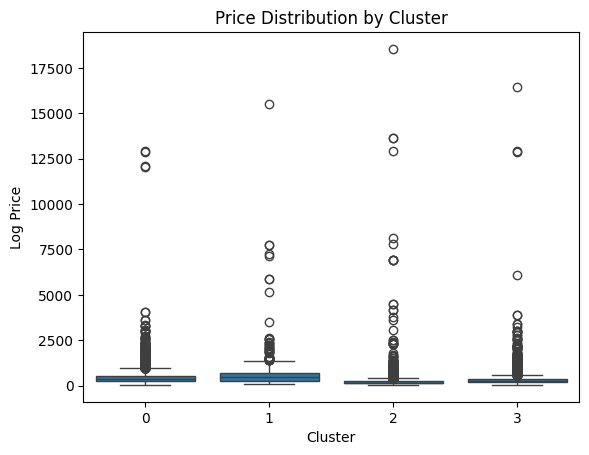

In [ ]:
sns.boxplot(data=df, x='cluster', y='realSum')
plt.title('Price Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Log Price')
plt.show()


In [ ]:
import folium
from folium.plugins import HeatMap

map = folium.Map(location=[50.0, 10.0], zoom_start=4)

# Prepare data for the heatmap, using price as the weight
heat_data = [[row['lat'], row['lng'], row['realSum']] for index, row in df.iterrows()]

# Create and add heatmap layer
HeatMap(
    heat_data,
    gradient={0.2: 'blue', 1: 'blue'},  # Single color for heatmap
    radius=15,  # Adjust radius for heat intensity
    blur=10,    # Adjust blur to spread the heat
    max_zoom=1
).add_to(map)

mapmap = folium.Map(location=[50.0, 10.0], zoom_start=4)

# Prepare data for the heatmap, using price as the weight
heat_data = [[row['lat'], row['lng'], row['realSum']] for index, row in df.iterrows()]

# Create and add heatmap layer
HeatMap(
    heat_data,
    gradient={0.2: 'blue', 1: 'blue'},  # Single color for heatmap
    radius=15,  # Adjust radius for heat intensity
    blur=10,    # Adjust blur to spread the heat
    max_zoom=1
).add_to(map)

map

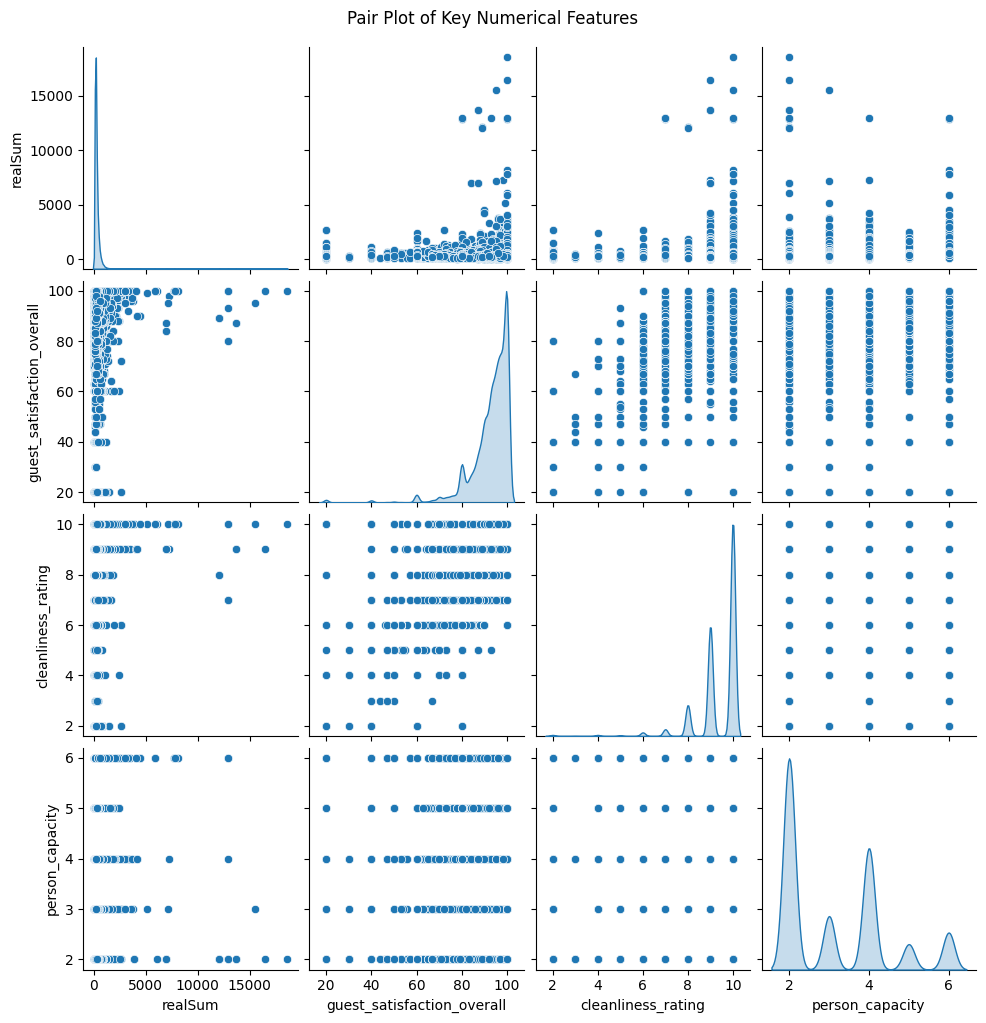

In [ ]:
sns.pairplot(df[['realSum', 'guest_satisfaction_overall', 'cleanliness_rating', 'person_capacity']], diag_kind='kde')
plt.suptitle('Pair Plot of Key Numerical Features', y=1.02)
plt.show()



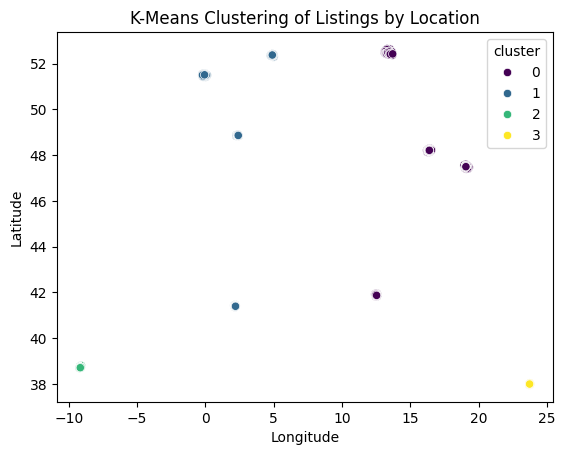

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['lng', 'lat']])

sns.scatterplot(data=df, x='lng', y='lat', hue='cluster', palette='viridis')
plt.title('K-Means Clustering of Listings by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# 4.&nbsp; Data Cleaning


Remeber to remove duplicated

### 4.1.1&nbsp;Null values

No Null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   room_type                   51707 non-null  object 
 3   room_shared                 51707 non-null  bool   
 4   room_private                51707 non-null  bool   
 5   person_capacity             51707 non-null  float64
 6   host_is_superhost           51707 non-null  bool   
 7   multi                       51707 non-null  int64  
 8   biz                         51707 non-null  int64  
 9   cleanliness_rating          51707 non-null  float64
 10  guest_satisfaction_overall  51707 non-null  float64
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_dist                  517

In [ ]:
# Find the number of duplicates before dropping
duplicates_before = df.duplicated().sum()
print(f"Number of duplicates before dropping: {duplicates_before}")

# Get the duplicate rows that will be dropped
duplicates = df[df.duplicated(keep='first')]

# Print out what was dropped
print("Rows that were dropped:")
print(duplicates)

# Drop duplicates from the DataFrame
df = df.drop_duplicates()



Number of duplicates before dropping: 0
Rows that were dropped:
Empty DataFrame
Columns: [Unnamed: 0, realSum, room_type, room_shared, room_private, person_capacity, host_is_superhost, multi, biz, cleanliness_rating, guest_satisfaction_overall, bedrooms, dist, metro_dist, attr_index, attr_index_norm, rest_index, rest_index_norm, lng, lat, Country, Day_Type]
Index: []

[0 rows x 22 columns]


### 4.1.2&nbsp; check for Outliers

In [ ]:
df.columns

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'Country', 'Day_Type'],
      dtype='object')

In [ ]:
# Calculate Q1, Q3, and IQR for 'realSum'
Q1 = np.percentile(df['realSum'], 25)
Q3 = np.percentile(df['realSum'], 75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in 'realSum'
outliers_count = df[(df['realSum'] < lower_bound) | (df['realSum'] > upper_bound)].shape[0]

# Print the number of outliers found
print(f"Number of outliers in 'realSum': {outliers_count}")

#######################################################

# Calculate Q1, Q3, and IQR for 'person_capacity'
Q1 = np.percentile(df['person_capacity'], 25)
Q3 = np.percentile(df['person_capacity'], 75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in 'person_capacity'
outliers_count = df[(df['person_capacity'] < lower_bound) | (df['person_capacity'] > upper_bound)].shape[0]

# Print the number of outliers found
print(f"Number of outliers in 'person_capacity': {outliers_count}")

#######################################################

# Calculate Q1, Q3, and IQR for 'cleanliness_rating'
Q1 = np.percentile(df['cleanliness_rating'], 25)
Q3 = np.percentile(df['cleanliness_rating'], 75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in 'cleanliness_rating'
outliers_count = df[(df['cleanliness_rating'] < lower_bound) | (df['cleanliness_rating'] > upper_bound)].shape[0]

# Print the number of outliers found
print(f"Number of outliers in 'cleanliness_rating': {outliers_count}")

#######################################################

# Calculate Q1, Q3, and IQR for 'guest_satisfaction_overall'
Q1 = np.percentile(df['guest_satisfaction_overall'], 25)
Q3 = np.percentile(df['guest_satisfaction_overall'], 75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in 'guest_satisfaction_overall'
outliers_count = df[(df['guest_satisfaction_overall'] < lower_bound) | (df['guest_satisfaction_overall'] > upper_bound)].shape[0]

# Print the number of outliers found
print(f"Number of outliers in 'guest_satisfaction_overall': {outliers_count}")

#######################################################

# Calculate Q1, Q3, and IQR for 'bedrooms'
Q1 = np.percentile(df['bedrooms'], 25)
Q3 = np.percentile(df['bedrooms'], 75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in 'bedrooms'
outliers_count = df[(df['bedrooms'] < lower_bound) | (df['bedrooms'] > upper_bound)].shape[0]

# Print the number of outliers found
print(f"Number of outliers in 'bedrooms': {outliers_count}")

#######################################################

# Calculate Q1, Q3, and IQR for 'dist'
Q1 = np.percentile(df['dist'], 25)
Q3 = np.percentile(df['dist'], 75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in 'dist'
outliers_count = df[(df['dist'] < lower_bound) | (df['dist'] > upper_bound)].shape[0]

# Print the number of outliers found
print(f"Number of outliers in 'dist': {outliers_count}")

#######################################################

# Calculate Q1, Q3, and IQR for 'metro_dist'
Q1 = np.percentile(df['metro_dist'], 25)
Q3 = np.percentile(df['metro_dist'], 75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in 'metro_dist'
outliers_count = df[(df['metro_dist'] < lower_bound) | (df['metro_dist'] > upper_bound)].shape[0]

# Print the number of outliers found
print(f"Number of outliers in 'metro_dist': {outliers_count}")

#######################################################

# Calculate Q1, Q3, and IQR for 'attr_index_norm'
Q1 = np.percentile(df['attr_index_norm'], 25)
Q3 = np.percentile(df['attr_index_norm'], 75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in 'attr_index_norm'
outliers_count = df[(df['attr_index_norm'] < lower_bound) | (df['attr_index_norm'] > upper_bound)].shape[0]

# Print the number of outliers found
print(f"Number of outliers in 'attr_index_norm': {outliers_count}")

#######################################################

# Calculate Q1, Q3, and IQR for 'rest_index'
Q1 = np.percentile(df['rest_index'], 25)
Q3 = np.percentile(df['rest_index'], 75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in 'rest_index'
outliers_count = df[(df['rest_index'] < lower_bound) | (df['rest_index'] > upper_bound)].shape[0]

# Print the number of outliers found
print(f"Number of outliers in 'rest_index': {outliers_count}")

#######################################################

# Calculate Q1, Q3, and IQR for 'rest_index_norm'
Q1 = np.percentile(df['rest_index_norm'], 25)
Q3 = np.percentile(df['rest_index_norm'], 75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in 'rest_index_norm'
outliers_count = df[(df['rest_index_norm'] < lower_bound) | (df['rest_index_norm'] > upper_bound)].shape[0]

# Print the number of outliers found
print(f"Number of outliers in 'rest_index_norm': {outliers_count}")

#######################################################

# Calculate total number of outliers across all columns
total_outliers = (
    df[(df['realSum'] < lower_bound) | (df['realSum'] > upper_bound)].shape[0] +
    df[(df['person_capacity'] < lower_bound) | (df['person_capacity'] > upper_bound)].shape[0] +
    df[(df['cleanliness_rating'] < lower_bound) | (df['cleanliness_rating'] > upper_bound)].shape[0] +
    df[(df['guest_satisfaction_overall'] < lower_bound) | (df['guest_satisfaction_overall'] > upper_bound)].shape[0] +
    df[(df['bedrooms'] < lower_bound) | (df['bedrooms'] > upper_bound)].shape[0] +
    df[(df['dist'] < lower_bound) | (df['dist'] > upper_bound)].shape[0] +
    df[(df['metro_dist'] < lower_bound) | (df['metro_dist'] > upper_bound)].shape[0] +
    df[(df['attr_index_norm'] < lower_bound) | (df['attr_index_norm'] > upper_bound)].shape[0] +
    df[(df['rest_index'] < lower_bound) | (df['rest_index'] > upper_bound)].shape[0] +
    df[(df['rest_index_norm'] < lower_bound) | (df['rest_index_norm'] > upper_bound)].shape[0]
)

# Print the total number of outliers
print(f"Total number of outliers: {total_outliers}")


total_data_points = df.shape[0]
print(f"Total number of data points in the dataset: {total_data_points}")

# Check if total outliers are more than 20% of the dataset size
if total_outliers > 0.2 * df.shape[0]:
    print("values excceed 20% of the dataset size")
else:
    print("values are less than 20% of the dataset size")



Number of outliers in 'realSum': 3662
Number of outliers in 'person_capacity': 0
Number of outliers in 'cleanliness_rating': 1830
Number of outliers in 'guest_satisfaction_overall': 2102
Number of outliers in 'bedrooms': 15374
Number of outliers in 'dist': 1746
Number of outliers in 'metro_dist': 5051
Number of outliers in 'attr_index_norm': 1852
Number of outliers in 'rest_index': 2166
Number of outliers in 'rest_index_norm': 998
Total number of outliers: 153650
Total number of data points in the dataset: 51707
values excceed 20% of the dataset size


In [ ]:
# Detect outliers for all numerical columns using IQR and combine them
numerical_cols = ['realSum', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms',
                  'person_capacity', 'dist', 'metro_dist', 'attr_index', 'rest_index']

outliers_combined = set()  # Using a set to avoid duplicate rows

for col in numerical_cols:
    # Calculate the 1st and 3rd quartile (Q1 and Q3) and the IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Add outliers to the combined set (using the index to track unique rows)
    outliers_combined.update(outliers.index)

# Calculate the total number of outliers
total_outliers = len(outliers_combined)
total_data_points = len(df)
outlier_percentage = (total_outliers / total_data_points) * 100

# Print the results
print(f"Total number of unique outliers across all columns: {total_outliers}")
print(f"Outliers represent {outlier_percentage:.2f}% of the total data points ({total_data_points} total).")


Total number of unique outliers across all columns: 23937
Outliers represent 46.29% of the total data points (51707 total).


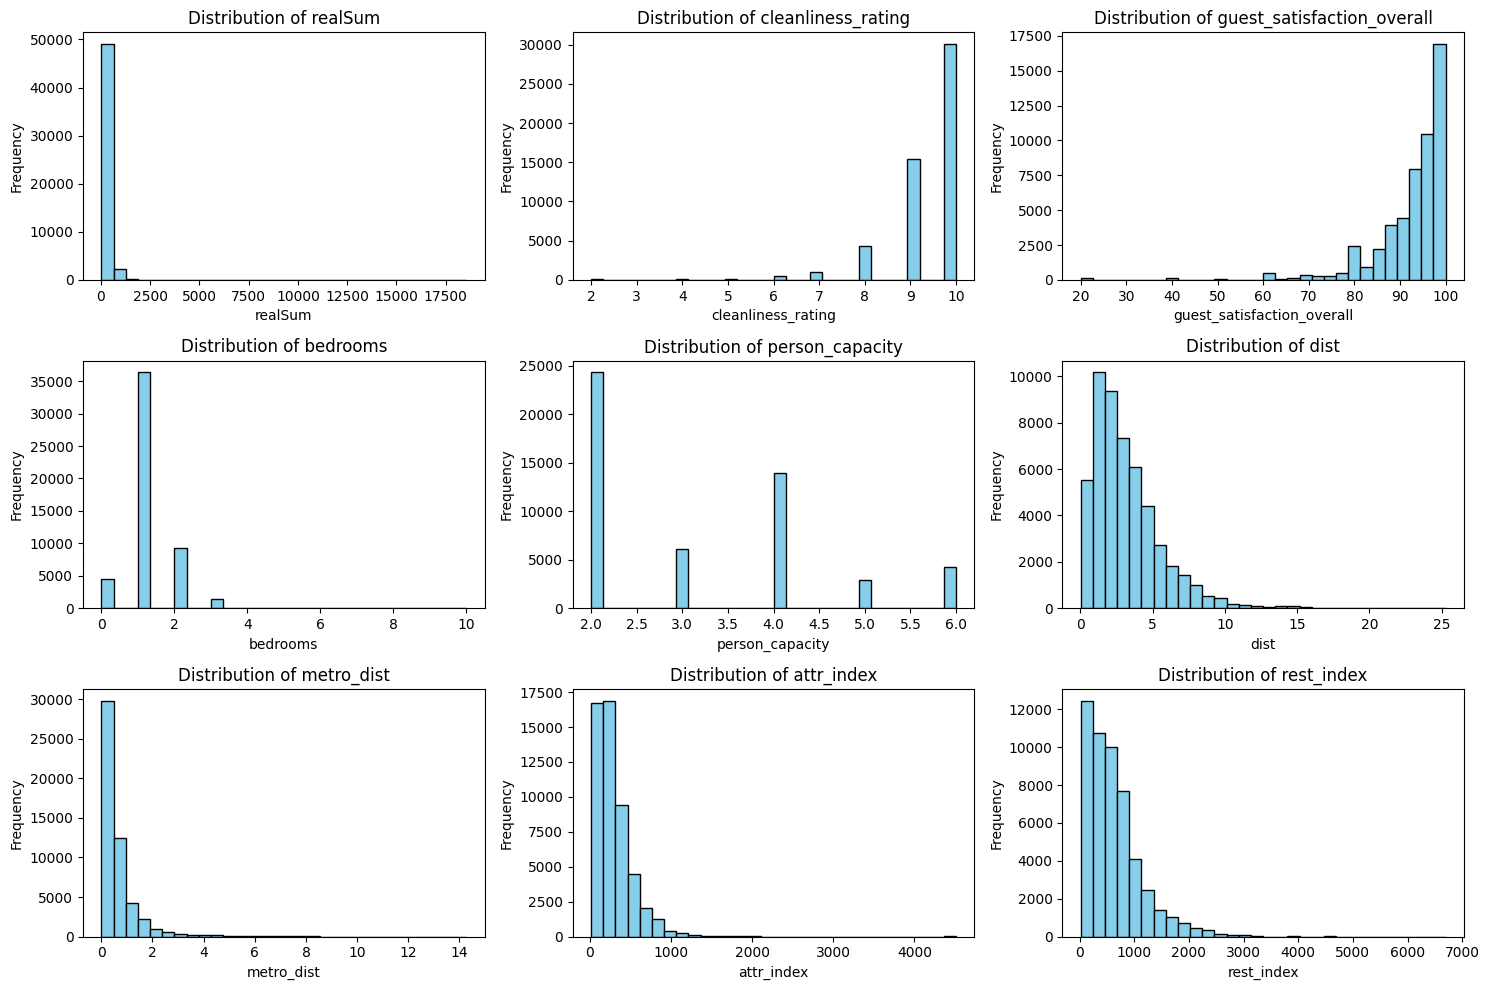

In [ ]:
import matplotlib.pyplot as plt

# List of numerical columns to check skewness
numerical_cols = ['realSum', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms',
                  'person_capacity', 'dist', 'metro_dist', 'attr_index', 'rest_index']

# Plot histograms to visualize the distribution of the data
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)  # 3 rows, 3 columns of plots
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#5.&nbsp; Feature Selection

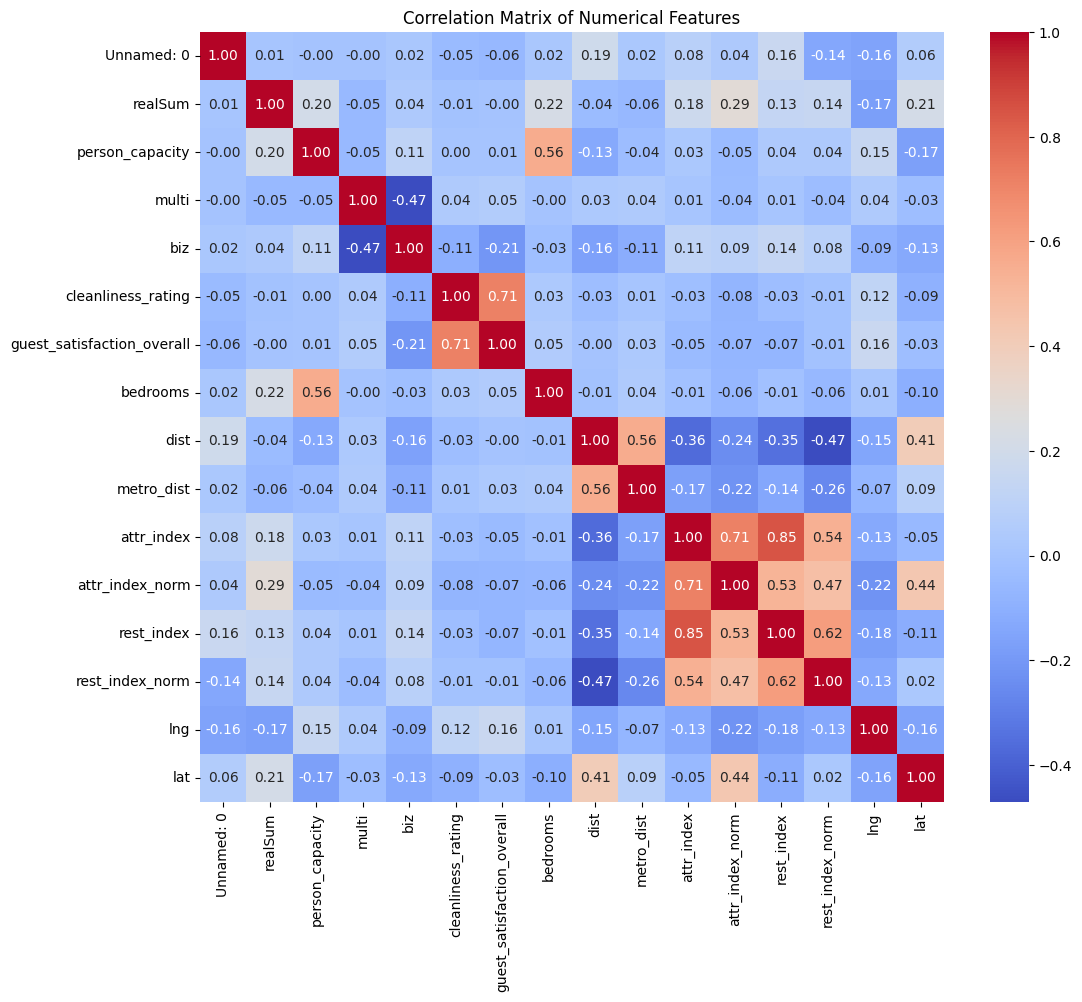

Highly Correlated Feature Pairs (above 0.8):
rest_index  attr_index    0.850229
attr_index  rest_index    0.850229
dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate numeric columns from the dataset
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Optional: Identify highly correlated pairs (above a threshold, e.g., 0.8)
high_correlation = correlation_matrix.unstack().sort_values(ascending=False)
high_correlation_pairs = high_correlation[(high_correlation > 0.8) & (high_correlation < 1)]
print("Highly Correlated Feature Pairs (above 0.8):")
print(high_correlation_pairs)



<Axes: xlabel='guest_satisfaction_overall', ylabel='cleanliness_rating'>

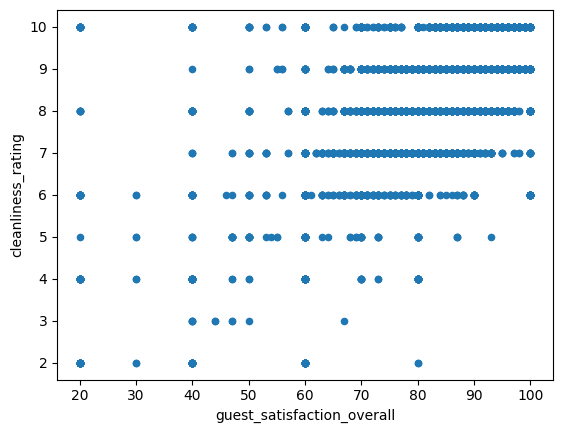

In [ ]:
df.plot(kind='scatter', x='guest_satisfaction_overall',y='cleanliness_rating')

In [ ]:
#df.drop(columns=['attr_index'], inplace=True)


In [ ]:
# Get column names as a list
column_names = df.columns.tolist()
print(column_names)


['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private', 'person_capacity', 'host_is_superhost', 'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng', 'lat', 'Country', 'Day_Type']


In [ ]:
df.drop(columns=['lat', 'lng'], inplace=True)


In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

# 6.&nbsp;One Hot Encoding

In [ ]:
df.columns

Index(['realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'Country', 'Day_Type'],
      dtype='object')

Applied One Hot encoding on Country and room type, which created 12 more columns and removed the main ones.

In [ ]:
import pandas as pd

# Assume `df` is your DataFrame
# Apply one-hot encoding on 'room_type' and 'Country'
df = pd.get_dummies(df, columns=['room_type', 'Country','Day_Type'], drop_first=False)
#df = pd.get_dummies(df, columns=['Day_Type'], drop_first=False)
# Display the updated DataFrame
print(df.head())


      realSum  room_shared  room_private  person_capacity  host_is_superhost  \
0  250.566814        False         False              3.0               True   
1  156.604259        False         False              3.0              False   
2  283.056354        False         False              5.0               True   
3  301.755370        False         False              4.0               True   
4  150.760816        False         False              2.0               True   

   multi  biz  cleanliness_rating  guest_satisfaction_overall  bedrooms  ...  \
0      1    0                10.0                        99.0         1  ...   
1      0    0                10.0                        97.0         1  ...   
2      0    1                10.0                        95.0         2  ...   
3      0    1                10.0                        94.0         2  ...   
4      0    1                10.0                        96.0         1  ...   

   Country_barcelona  Country_berlin  

In [ ]:
# Get column names as a list
column_names = df.columns.tolist()
print(column_names)


['realSum', 'room_shared', 'room_private', 'person_capacity', 'host_is_superhost', 'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room', 'Country_amsterdam', 'Country_athens', 'Country_barcelona', 'Country_berlin', 'Country_budapest', 'Country_lisbon', 'Country_london', 'Country_paris', 'Country_rome', 'Country_vienna', 'Day_Type_Weekday', 'Day_Type_Weekend']


In [ ]:
df


realSum  room_shared  room_private  person_capacity  \
0      250.566814        False         False              3.0   
1      156.604259        False         False              3.0   
2      283.056354        False         False              5.0   
3      301.755370        False         False              4.0   
4      150.760816        False         False              2.0   
...           ...          ...           ...              ...   
51702  232.074413        False          True              2.0   
51703  175.049079        False         False              2.0   
51704  158.689352        False         False              2.0   
51705  134.617182        False          True              4.0   
51706  155.417407        False         False              3.0   

       host_is_superhost  multi  biz  cleanliness_rating  \
0                   True      1    0                10.0   
1                  False      0    0                10.0   
2                   True      0    1                10.0   
3                   True      0    1                10.0   
4                   True      0    1                10.0   
...                  ...    ...  ...                 ...   
51702              False      1    0                10.0   
51703              False      0    0                10.0   
51704              False      0    0                 9.0   
51705              False      1    0                10.0   
51706              False      0    0                 9.0   

       guest_satisfaction_overall  bedrooms  ...  Country_barcelona  \
0                            99.0         1  ...              False   
1                            97.0         1  ...              False   
2                            95.0         2  ...              False   
3                            94.0         2  ...              False   
4                            96.0         1  ...              False   
...                           ...       ...  ...                ...   
51702                        96.0         1  ...              False   
51703                       100.0         1  ...              False   
51704                        91.0         1  ...              False   
51705                        93.0         1  ...              False   
51706                        86.0         1  ...              False   

       Country_berlin  Country_budapest  Country_lisbon  Country_london  \
0               False             False           False           False   
1               False             False           False           False   
2               False             False           False           False   
3               False             False           False           False   
4               False             False           False           False   
...               ...               ...             ...             ...   
51702            True             False           False           False   
51703            True             False           False           False   
51704            True             False           False           False   
51705            True             False           False           False   
51706            True             False           False           False   

       Country_paris  Country_rome  Country_vienna  Day_Type_Weekday  \
0              False         False            True              True   
1              False         False            True              True   
2              False         False            True              True   
3              False         False            True              True   
4              False         False            True              True   
...              ...           ...             ...               ...   
51702          False         False           False              True   
51703          False         False           False              True   
51704          False         False           False              True   
51705          False         False

In [ ]:
df.sample(10)

realSum  room_shared  room_private  person_capacity  \
7333   104.573013        False          True              2.0   
16683  393.092373        False         False              6.0   
47718  158.882666        False         False              6.0   
46989   74.051508        False         False              3.0   
34668  172.772543        False          True              3.0   
30147  227.720450        False         False              4.0   
36097  131.391298        False         False              3.0   
40623  307.111567        False         False              2.0   
48318  162.397769        False         False              2.0   
42149  740.749371        False         False              5.0   

       host_is_superhost  multi  biz  cleanliness_rating  \
7333               False      0    0                 2.0   
16683              False      0    1                 9.0   
47718               True      1    0                10.0   
46989              False      0    0                 8.0   
34668              False      1    0                 9.0   
30147              False      0    1                 9.0   
36097              False      1    0                10.0   
40623              False      0    0                10.0   
48318               True      0    1                10.0   
42149              False      0    1                 8.0   

       guest_satisfaction_overall  bedrooms  ...  Country_barcelona  \
7333                         20.0         1  ...              False   
16683                       100.0         2  ...               True   
47718                        99.0         2  ...              False   
46989                        72.0         1  ...              False   
34668                        84.0         2  ...              False   
30147                        91.0         1  ...              False   
36097                        93.0         0  ...              False   
40623                        96.0         0  ...              False   
48318                        98.0         0  ...              False   
42149                        80.0         2  ...              False   

       Country_berlin  Country_budapest  Country_lisbon  Country_london  \
7333            False              True           False           False   
16683           False             False           False           False   
47718           False             False           False           False   
46989           False             False           False           False   
34668           False             False           False           False   
30147           False             False            True           False   
36097           False             False           False           False   
40623           False             False           False           False   
48318           False             False           False           False   
42149           False             False           False           False   

       Country_paris  Country_rome  Country_vienna  Day_Type_Weekday  \
7333           False         False           False              True   
16683          False         False           False             False   
47718          False         False           False             False   
46989          False         False           False             False   
34668          False          True           False              True   
30147          False         False           False             False   
36097          False          True           False              True   
40623           True         False           False             False   
48318          False         False           False             False   
42149           True         False           False             False   

       Day_Type_Weekend  
7333              False  
16683              True  
47718              True  
46989              True  
34668             False  
30147              True  
36097             False  
40623              True 

 4.2&nbsp; Preprocessing

# 7.&nbsp;Feature Scaling


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import pandas as pd

# Assuming df is your main DataFrame and 'realSum' is the first column
# Exclude 'realSum' from features
features = df.columns.tolist()
features.remove('realSum')

# Automatically detect feature groups based on data types
numeric_features = df[features].select_dtypes(include=['int64', 'float64']).columns.tolist()
binary_features = df[features].select_dtypes(include=['bool']).columns.tolist()
categorical_features = df[features].select_dtypes(include=['object']).columns.tolist()

# Create ColumnTransformer for scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),       # Standardize numeric features
        ('binary', 'passthrough', binary_features),       # Pass binary features as is
        ('categorical', 'passthrough', categorical_features)  # Pass categorical features as is (already one-hot encoded)
    ]
)

# Apply transformations to features only (excluding 'realSum')
X_scaled = preprocessor.fit_transform(df[features])

# Convert back to DataFrame
X_scaled_df = pd.DataFrame(
    X_scaled,
    columns=numeric_features + binary_features + categorical_features
)

# Add 'realSum' back as the first column
X_scaled_df.insert(0, 'realSum', df['realSum'])

# Display the first few rows to verify
print(X_scaled_df.head())




      realSum  person_capacity     multi       biz  cleanliness_rating  \
0  250.566814        -0.124495  1.559571 -0.734128            0.638184   
1  156.604259        -0.124495 -0.641202 -0.734128            0.638184   
2  283.056354         1.415705 -0.641202  1.362159            0.638184   
3  301.755370         0.645605 -0.641202  1.362159            0.638184   
4  150.760816        -0.894595 -0.641202  1.362159            0.638184   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                    0.712292 -0.253043 -0.609242   -0.546509   -0.781116   
1                    0.488714 -0.253043  0.675345   -0.528297   -0.952424   
2                    0.265137  1.340826 -0.158541   -0.509755   -0.858529   
3                    0.153348  1.340826  0.020599   -0.082877   -0.897568   
4                    0.376926 -0.253043 -0.396920    0.510442   -0.756155   

   ...  Country_barcelona  Country_berlin  Country_budapest  Country_lisbon  \
0  ...       

# 8.&nbsp;Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
#new
# Define the features (X) and target (y)
X = df.drop(columns=['realSum'])  # Drop the target variable from the features
y = df['realSum']  # Target variable

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets to confirm
print(f"Training set shape: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Testing set shape: X_test = {X_test.shape}, y_test = {y_test.shape}")


Training set shape: X_train = (41365, 30), y_train = (41365,)
Testing set shape: X_test = (10342, 30), y_test = (10342,)


# 9.&nbsp; PCA analysis

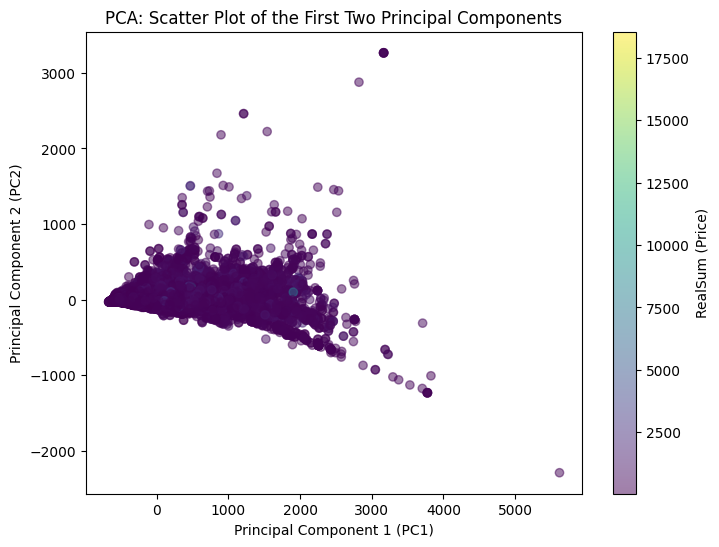

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce the data to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)  # Use training data for PCA

# Create a DataFrame with the 2 principal components
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Plot the scatter plot of the 2 principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=y_train, cmap='viridis', alpha=0.5)
plt.title('PCA: Scatter Plot of the First Two Principal Components')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.colorbar(label='RealSum (Price)')
plt.show()


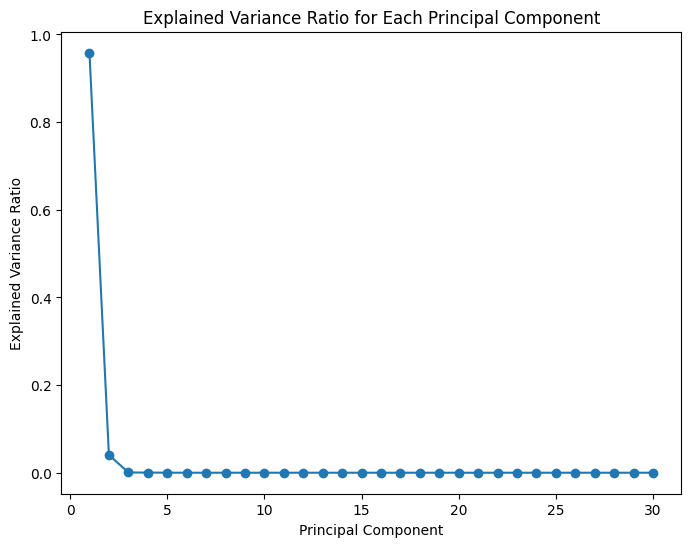

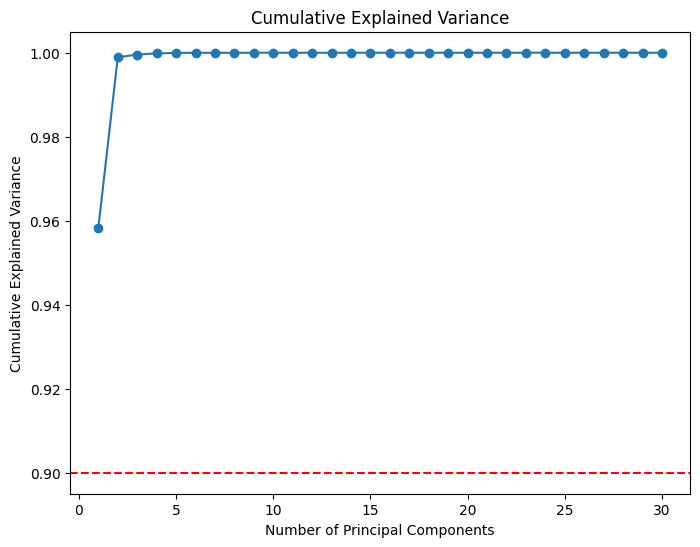

In [ ]:
# Apply PCA to the entire dataset to examine the explained variance
pca_full = PCA()
pca_full.fit(X_train)

# Plot the explained variance ratio for each component
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), pca_full.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.90, color='r', linestyle='--')  # 90% variance line
plt.show()


# 10.&nbsp;Clustering

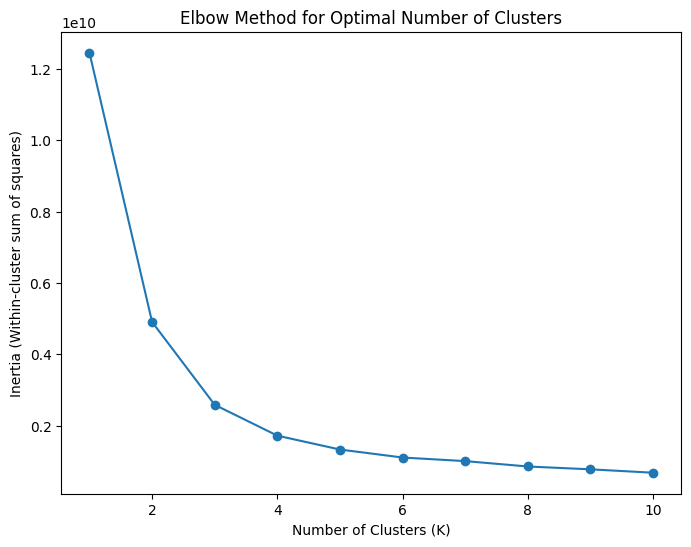

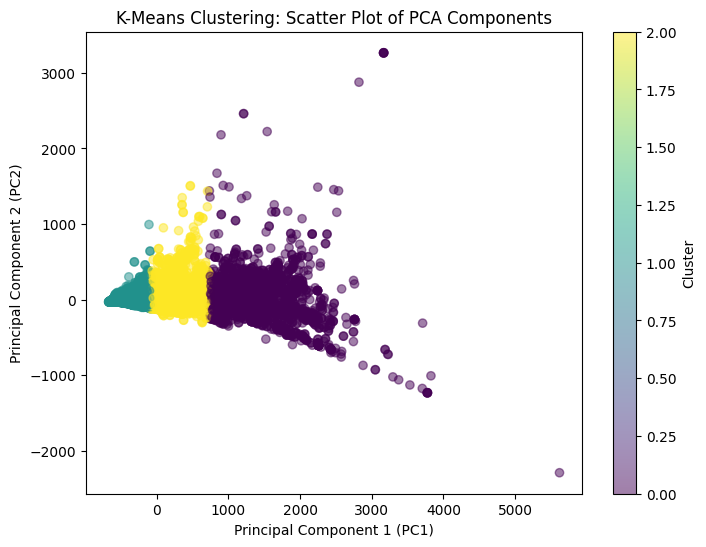

Silhouette Score: 0.5540139976506545


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Apply PCA for dimensionality reduction (using 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)  # Apply PCA on the training data

# Step 2: Use the Elbow Method to determine the optimal number of clusters (K)
inertia = []  # List to hold the inertia for each value of K
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.show()

# Step 3: Apply K-Means clustering with the optimal number of clusters (e.g., K=3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)  # Get the cluster labels for the PCA-reduced data

# Step 4: Add the cluster labels to the training data (X_train)
X_train['Cluster'] = clusters  # Assign cluster labels to the X_train DataFrame

# Step 5: Visualize the clusters using a scatter plot of the PCA components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering: Scatter Plot of PCA Components')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.colorbar(label='Cluster')
plt.show()

# Step 6: Optionally, evaluate the clustering quality using the Silhouette Score
sil_score = silhouette_score(X_pca, clusters)
print(f'Silhouette Score: {sil_score}')



**Cluster Analysis:**

The clusters represent groups of listings with similar characteristics. For example:
  Cluster 0 has listings with relatively low prices and lower guest_satisfaction_overall scores.
  Cluster 4 has listings with higher prices (realSum ~394.43), higher guest satisfaction, and larger person_capacity.

**Interpretation of Differences:**

  Different clusters show meaningful variations in realSum, person_capacity, biz, and other features.

**For instance:**
  Cluster 0: Lower-priced listings with fewer bedrooms and lower satisfaction scores.
  Cluster 4: Higher-priced listings with more bedrooms, larger capacities, and higher satisfaction.



*   Cluster 0: Budget accommodations with lower satisfaction scores and cleanliness.
*   Cluster 4: Premium listings with higher prices, larger capacities, and better ratings.
*   Cluster 2 and 3: Mid-range listings with intermediate values for most features.
*  Cluster 1: Possibly listings with a unique combination of low realSum but decent guest satisfaction.




# 11.&nbsp;Model 2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_shared                 51707 non-null  bool   
 2   room_private                51707 non-null  bool   
 3   person_capacity             51707 non-null  float64
 4   host_is_superhost           51707 non-null  bool   
 5   multi                       51707 non-null  int64  
 6   biz                         51707 non-null  int64  
 7   cleanliness_rating          51707 non-null  float64
 8   guest_satisfaction_overall  51707 non-null  float64
 9   bedrooms                    51707 non-null  int64  
 10  dist                        51707 non-null  float64
 11  metro_dist                  51707 non-null  float64
 12  attr_index                  51707 non-null  float64
 13  attr_index_norm             517

## 11.1.&nbsp;NO PCA


###  Linear Regression

Linear Regression - MSE: 106610.87870936685, RMSE: 326.51321368264234, MAE: 101.14436872129521, R²: 0.21774281979300392


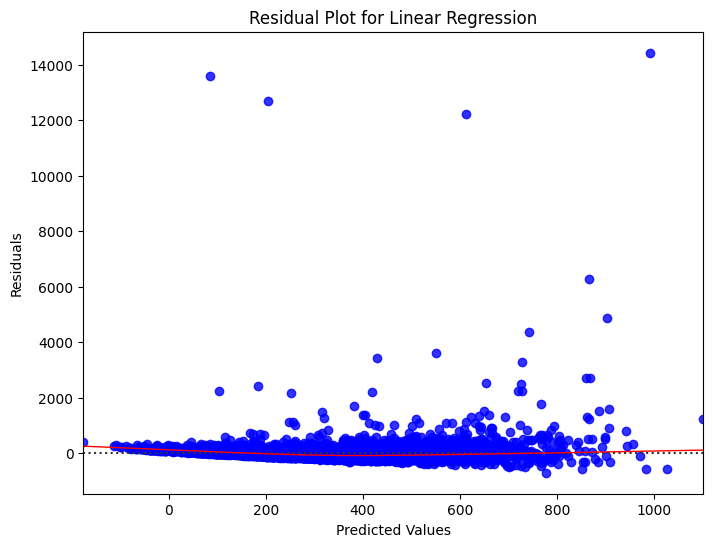

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Remove 'Cluster' column (if included) from both X_train and X_test
X_train_no_cluster = X_train.drop(columns=['Cluster'], errors='ignore')  # Remove Cluster if it exists
X_test_no_cluster = X_test.drop(columns=['Cluster'], errors='ignore')  # Remove Cluster if it exists

# Initialize the model
linear_regressor = LinearRegression()

# Train the model
linear_regressor.fit(X_train_no_cluster, y_train)

# Make predictions
y_pred_linear = linear_regressor.predict(X_test_no_cluster)

# Calculate evaluation metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Print results
print(f"Linear Regression - MSE: {mse_linear}, RMSE: {rmse_linear}, MAE: {mae_linear}, R²: {r2_linear}")

# Residual plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_linear, y=y_test - y_pred_linear, lowess=True, color='blue', line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot for Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


### Lasso

Lasso Regression - MSE: 106653.4919665982, RMSE: 326.57846219032604, MAE: 100.11388515331775, R²: 0.21743014507495662


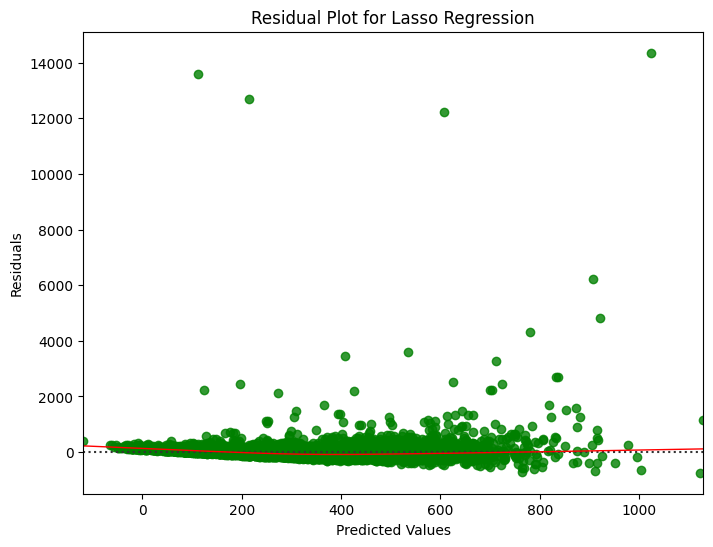

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Remove the 'Cluster' column from X_train and X_test if it exists
X_train_no_cluster = X_train.drop(columns=['Cluster'], errors='ignore')  # Remove 'Cluster' from X_train
X_test_no_cluster = X_test.drop(columns=['Cluster'], errors='ignore')    # Remove 'Cluster' from X_test

# Initialize the model with alpha (regularization strength)
lasso_regressor = Lasso(alpha=1.0)  # You can adjust the alpha value if needed

# Train the model
lasso_regressor.fit(X_train_no_cluster, y_train)

# Make predictions
y_pred_lasso = lasso_regressor.predict(X_test_no_cluster)

# Calculate evaluation metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print results
print(f"Lasso Regression - MSE: {mse_lasso}, RMSE: {rmse_lasso}, MAE: {mae_lasso}, R²: {r2_lasso}")

# Residual plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_lasso, y=y_test - y_pred_lasso, lowess=True, color='green', line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot for Lasso Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


### RIDGE

Ridge Regression - MSE: 106610.42031942181, RMSE: 326.51251173488254, MAE: 101.13947717861733, R²: 0.21774618322861372


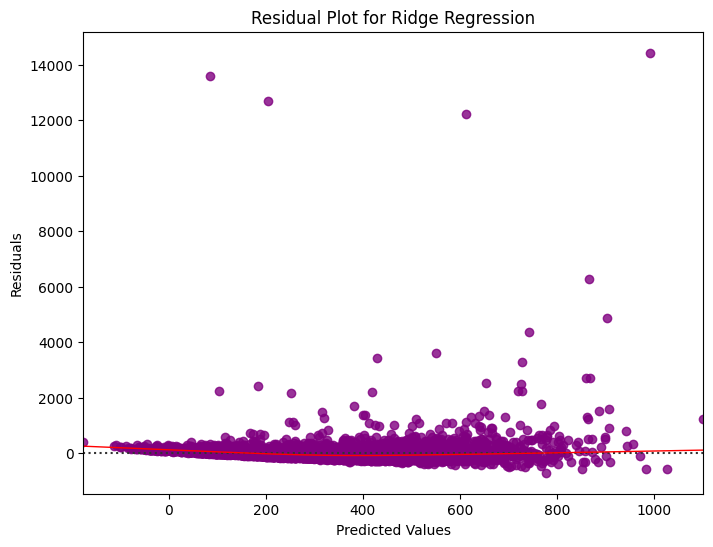

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Remove the 'Cluster' column from X_train and X_test if it exists
X_train_no_cluster = X_train.drop(columns=['Cluster'], errors='ignore')  # Remove 'Cluster' from X_train
X_test_no_cluster = X_test.drop(columns=['Cluster'], errors='ignore')    # Remove 'Cluster' from X_test

# Initialize the Ridge model with alpha (regularization strength)
ridge_regressor = Ridge(alpha=1.0)  # You can adjust the alpha value if needed

# Train the model
ridge_regressor.fit(X_train_no_cluster, y_train)

# Make predictions
y_pred_ridge = ridge_regressor.predict(X_test_no_cluster)

# Calculate evaluation metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print results
print(f"Ridge Regression - MSE: {mse_ridge}, RMSE: {rmse_ridge}, MAE: {mae_ridge}, R²: {r2_ridge}")

# Residual plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_ridge, y=y_test - y_pred_ridge, lowess=True, color='purple', line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot for Ridge Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


### Elastic

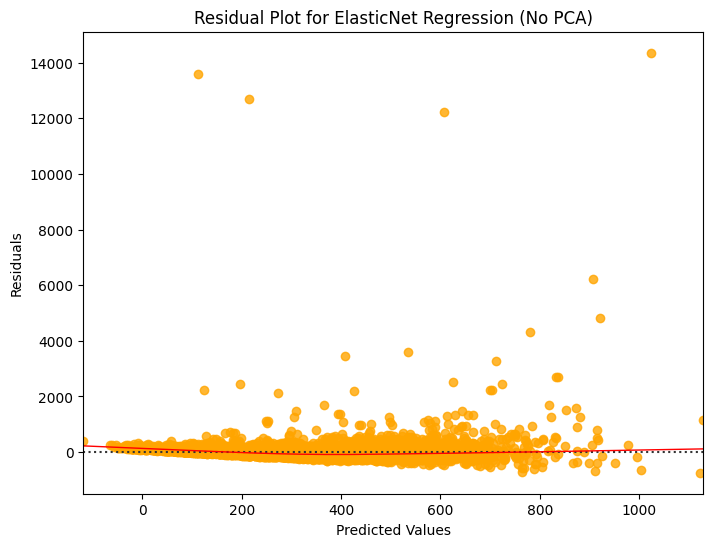

ElasticNet Regression (No PCA) - MSE: 106653.4919665982, RMSE: 326.57846219032604, MAE: 100.11388515331775, R²: 0.21743014507495662


In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Remove the 'Cluster' column from X_train and X_test if it exists
X_train_no_cluster = X_train.drop(columns=['Cluster'], errors='ignore')  # Remove 'Cluster' from X_train
X_test_no_cluster = X_test.drop(columns=['Cluster'], errors='ignore')    # Remove 'Cluster' from X_test

# Initialize the ElasticNet model with alpha and l1_ratio for regularization
elasticnet_regressor = ElasticNet(alpha=1.0, l1_ratio=1)  # You can adjust alpha and l1_ratio for ElasticNet regularization

# Train and evaluate ElasticNet without PCA
# Fit model to the original data without PCA
elasticnet_regressor.fit(X_train_no_cluster, y_train)

# Make predictions
y_pred_elastic = elasticnet_regressor.predict(X_test_no_cluster)

# Calculate evaluation metrics
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
rmse_elastic = np.sqrt(mse_elastic)
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

# Residual plot for the model
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_elastic, y=y_test - y_pred_elastic, lowess=True, color='orange', line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot for ElasticNet Regression (No PCA)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Print the evaluation metrics
print(f"ElasticNet Regression (No PCA) - MSE: {mse_elastic}, RMSE: {rmse_elastic}, MAE: {mae_elastic}, R²: {r2_elastic}")


#### Elastic gridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Remove the 'Cluster' column from X_train and X_test if it exists
X_train_no_cluster = X_train.drop(columns=['Cluster'], errors='ignore')  # Remove 'Cluster' from X_train
X_test_no_cluster = X_test.drop(columns=['Cluster'], errors='ignore')    # Remove 'Cluster' from X_test

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 10.0],  # Regularization strength
    'l1_ratio': [0.1, 0.5, 0.7, 1.0],  # Mix ratio between Lasso and Ridge
    'max_iter': [1000, 5000],  # Maximum number of iterations
}

# Initialize ElasticNet
elasticnet = ElasticNet()

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(elasticnet, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train_no_cluster, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_model.predict(X_test_no_cluster)

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Print evaluation metrics for the best model
print(f"Best Model - MSE: {mse_best}, RMSE: {rmse_best}, MAE: {mae_best}, R²: {r2_best}")


Best hyperparameters: {'alpha': 0.1, 'l1_ratio': 1.0, 'max_iter': 1000}
Best Model - MSE: 106587.72455675827, RMSE: 326.4777550718552, MAE: 100.96905223552238, R²: 0.21791271335685924


## 11.2.&nbsp;WITH PCA

PS. YOU CAN JUST RUN "FINAL SUMMARY FOR PCA MODELS"

### Linear Regression

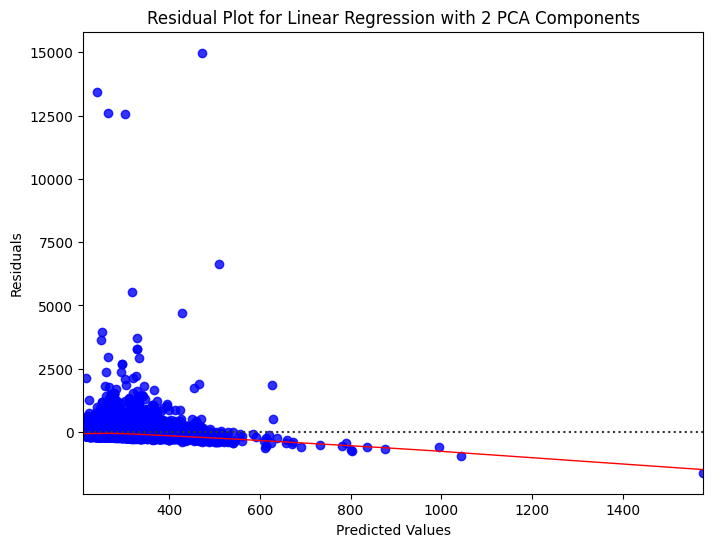

Linear Regression with 2 PCA components - MSE: 131933.71195766612, RMSE: 363.2268051199775, MAE: 141.63564830258662, R²: 0.0319365646389872
Linear Regression with 3 PCA components - MSE: 131225.0344744001, RMSE: 362.24996131732036, MAE: 139.68857692129006, R²: 0.03713648472638398
Linear Regression with 4 PCA components - MSE: 131138.38768596362, RMSE: 362.1303462649376, MAE: 139.44165688581833, R²: 0.037772255420865375
Linear Regression with 5 PCA components - MSE: 124013.73139457816, RMSE: 352.15583396357096, MAE: 130.07053413973966, R²: 0.09004941144765966
Linear Regression with 6 PCA components - MSE: 124009.57090180147, RMSE: 352.1499267383162, MAE: 130.07936376729336, R²: 0.0900799390578545
Linear Regression with 7 PCA components - MSE: 116430.5630477298, RMSE: 341.2192301845396, MAE: 118.69018671593781, R²: 0.14569089906931054
Linear Regression with 8 PCA components - MSE: 116495.3101093185, RMSE: 341.31409304234495, MAE: 118.56248663470618, R²: 0.14521581759133928
Linear Regress

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Remove the 'Cluster' column from X_train and X_test if it exists
X_train_no_cluster = X_train.drop(columns=['Cluster'], errors='ignore')  # Remove 'Cluster' from X_train
X_test_no_cluster = X_test.drop(columns=['Cluster'], errors='ignore')    # Remove 'Cluster' from X_test

# Initialize the Linear Regression model
linear_regressor = LinearRegression()

# Experiment with PCA components from 2 to 18
for n_components in range(2, 19):  # From 2 to 18 components
    # Apply PCA to reduce the data to n_components
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_no_cluster)  # Apply PCA to training data
    X_test_pca = pca.transform(X_test_no_cluster)  # Apply PCA to test data

    # Train the Linear Regression model on PCA-reduced data
    linear_regressor.fit(X_train_pca, y_train)

    # Make predictions
    y_pred_linear = linear_regressor.predict(X_test_pca)

    # Calculate evaluation metrics
    mse_linear = mean_squared_error(y_test, y_pred_linear)
    rmse_linear = np.sqrt(mse_linear)
    mae_linear = mean_absolute_error(y_test, y_pred_linear)
    r2_linear = r2_score(y_test, y_pred_linear)

    # For the first component (n_components == 2), plot the residual plot
    if n_components == 2:
        plt.figure(figsize=(8, 6))
        sns.residplot(x=y_pred_linear, y=y_test - y_pred_linear, lowess=True, color='blue', line_kws={'color': 'red', 'lw': 1})
        plt.title(f'Residual Plot for Linear Regression with {n_components} PCA Components')
        plt.xlabel('Predicted Values')
        plt.ylabel('Residuals')
        plt.show()

    # Print the evaluation metrics for the current PCA components
    print(f"Linear Regression with {n_components} PCA components - MSE: {mse_linear}, RMSE: {rmse_linear}, MAE: {mae_linear}, R²: {r2_linear}")


### Lasso, Ridge, Elastic

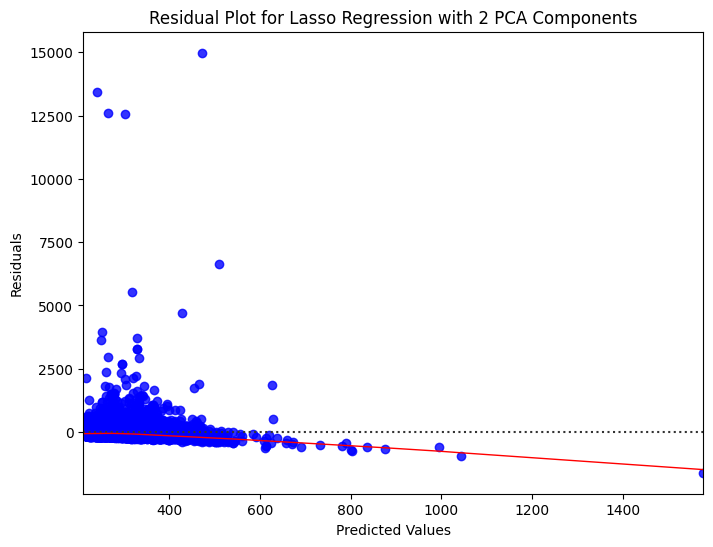

Lasso Regression with 2 PCA components - MSE: 131933.8674015455, RMSE: 363.22701909624715, MAE: 141.63603249588868, R²: 0.03193542406972982
Lasso Regression with 3 PCA components - MSE: 131224.94227098793, RMSE: 362.2498340523953, MAE: 139.68963761289396, R²: 0.03713716126879785
Lasso Regression with 4 PCA components - MSE: 131139.4868804291, RMSE: 362.131863939683, MAE: 139.44575926704107, R²: 0.037764190082942406
Lasso Regression with 5 PCA components - MSE: 124021.61097843866, RMSE: 352.167021423697, MAE: 130.08200561762516, R²: 0.08999159501160237
Lasso Regression with 6 PCA components - MSE: 124019.50683022817, RMSE: 352.1640339816492, MAE: 130.08545735698448, R²: 0.09000703419628775
Lasso Regression with 7 PCA components - MSE: 116447.2796115009, RMSE: 341.2437246477961, MAE: 118.60732468221128, R²: 0.14556824130495638
Lasso Regression with 8 PCA components - MSE: 116491.28168842966, RMSE: 341.3081916515185, MAE: 118.45469720159286, R²: 0.14524537612423327
Lasso Regression with 9

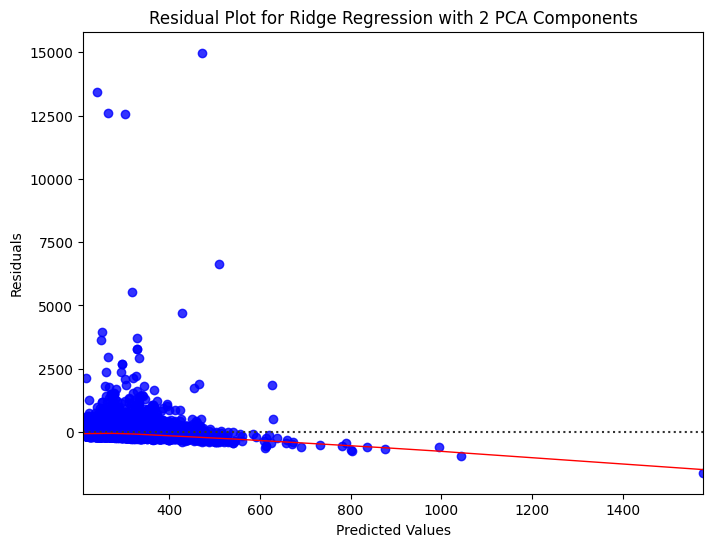

Ridge Regression with 2 PCA components - MSE: 131933.71195865658, RMSE: 363.22680512134093, MAE: 141.63564830519155, R²: 0.03193656463171979
Ridge Regression with 3 PCA components - MSE: 131225.03446306597, RMSE: 362.2499613016763, MAE: 139.6885769556929, R²: 0.03713648480954834
Ridge Regression with 4 PCA components - MSE: 131138.38769157816, RMSE: 362.13034627268974, MAE: 139.44165695596163, R²: 0.03777225537966866
Ridge Regression with 5 PCA components - MSE: 124013.73304703676, RMSE: 352.1558363097746, MAE: 130.07053519813576, R²: 0.09004939932274703
Ridge Regression with 6 PCA components - MSE: 124009.57257315714, RMSE: 352.1499291113902, MAE: 130.0793647377919, R²: 0.09007992679428456
Ridge Regression with 7 PCA components - MSE: 116430.57405222302, RMSE: 341.21924630979277, MAE: 118.69004557227827, R²: 0.14569081832385622
Ridge Regression with 8 PCA components - MSE: 116495.31426167767, RMSE: 341.31409912524515, MAE: 118.56233427617813, R²: 0.14521578712340932
Ridge Regression w

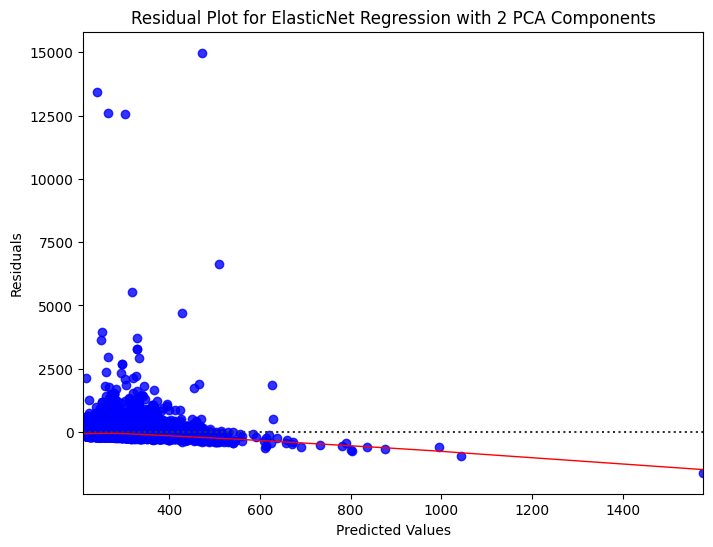

ElasticNet Regression with 2 PCA components - MSE: 131933.8101549023, RMSE: 363.22694029339607, MAE: 141.6358942675098, R²: 0.03193584411689776
ElasticNet Regression with 3 PCA components - MSE: 131224.76367901635, RMSE: 362.24958754844204, MAE: 139.68986747215473, R²: 0.03713847168715079
ElasticNet Regression with 4 PCA components - MSE: 131139.05904366067, RMSE: 362.1312732196167, MAE: 139.44518016000578, R²: 0.03776732933465954
ElasticNet Regression with 5 PCA components - MSE: 124052.12610154782, RMSE: 352.2103435470739, MAE: 130.09981436600592, R²: 0.08976769033652587
ElasticNet Regression with 6 PCA components - MSE: 124049.22959245904, RMSE: 352.2062316207069, MAE: 130.10520468894927, R²: 0.08978894346809807
ElasticNet Regression with 7 PCA components - MSE: 116919.072863506, RMSE: 341.9343107433151, MAE: 117.4539473135642, R²: 0.14210645894820162
ElasticNet Regression with 8 PCA components - MSE: 116928.88357551458, RMSE: 341.94865634406955, MAE: 117.26321448821705, R²: 0.14203

In [ ]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the models
lasso_regressor = Lasso(alpha=1.0)  # You can adjust alpha for Lasso regularization
ridge_regressor = Ridge(alpha=1.0)  # You can adjust alpha for Ridge regularization
elasticnet_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5)  # ElasticNet with equal mix of Lasso and Ridge

# Function to train and evaluate the model
def train_and_evaluate(model, model_name, X_train, X_test, y_train, y_test, pca_components_range):
    # Remove 'Cluster' column if it exists
    X_train_no_cluster = X_train.drop(columns=['Cluster'], errors='ignore')  # Remove 'Cluster' from X_train
    X_test_no_cluster = X_test.drop(columns=['Cluster'], errors='ignore')    # Remove 'Cluster' from X_test

    for n_components in pca_components_range:
        # Apply PCA to reduce the data to n_components
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train_no_cluster)  # Apply PCA to training data
        X_test_pca = pca.transform(X_test_no_cluster)  # Apply PCA to test data

        # Train the model on PCA-reduced data
        model.fit(X_train_pca, y_train)

        # Make predictions
        y_pred = model.predict(X_test_pca)

        # Calculate evaluation metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # For the first component (n_components == 2), plot the residual plot
        if n_components == 2:
            plt.figure(figsize=(8, 6))
            sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, color='blue', line_kws={'color': 'red', 'lw': 1})
            plt.title(f'Residual Plot for {model_name} with {n_components} PCA Components')
            plt.xlabel('Predicted Values')
            plt.ylabel('Residuals')
            plt.show()

        # Print the evaluation metrics
        print(f"{model_name} with {n_components} PCA components - MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R²: {r2}")

# PCA components range from 2 to 18
pca_components_range = range(2, 19)

# Train and evaluate each model
train_and_evaluate(lasso_regressor, "Lasso Regression", X_train, X_test, y_train, y_test, pca_components_range)

train_and_evaluate(ridge_regressor, "Ridge Regression", X_train, X_test, y_train, y_test, pca_components_range)

train_and_evaluate(elasticnet_regressor, "ElasticNet Regression", X_train, X_test, y_train, y_test, pca_components_range)


# 12.&nbsp;  Results

## PCA

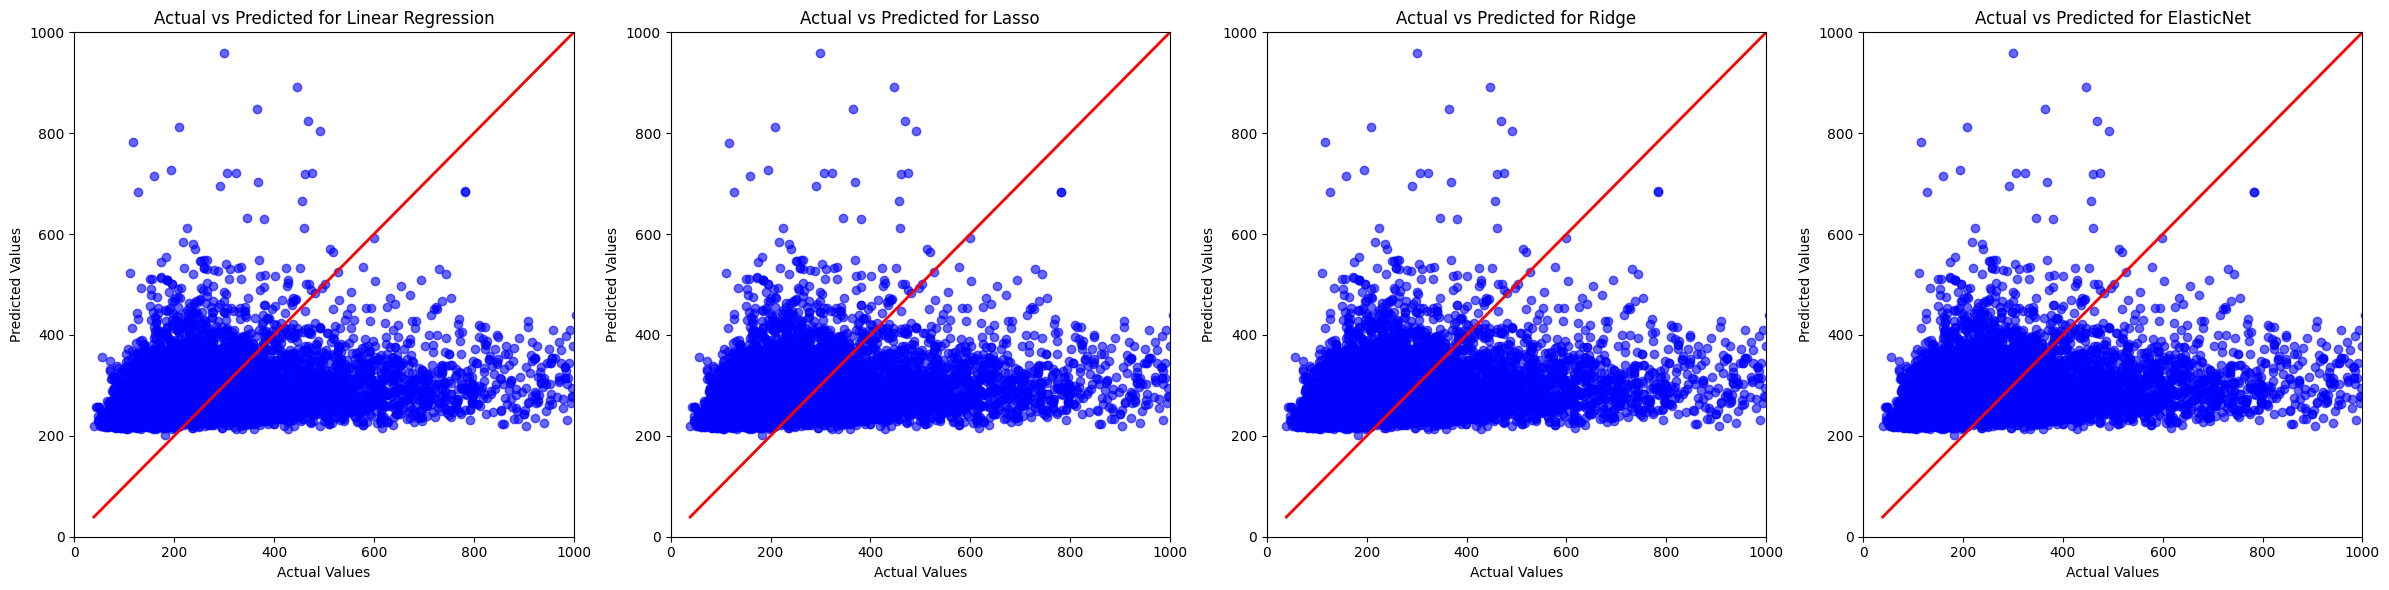

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize the models
linear_regressor = LinearRegression()
lasso_regressor = Lasso(alpha=1.0)
ridge_regressor = Ridge(alpha=1.0)
elasticnet_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5)

# Create a dictionary for models
models = {
    "Linear Regression": linear_regressor,
    "Lasso": lasso_regressor,
    "Ridge": ridge_regressor,
    "ElasticNet": elasticnet_regressor
}

# Initialize a figure
plt.figure(figsize=(24, 6))

# Iterate through each model to generate the plot
for i, (model_name, model) in enumerate(models.items(), 1):
    # Apply PCA for a fixed number of components (e.g., 2 for simplicity in this plot)
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train_no_cluster)  # Apply PCA to training data
    X_test_pca = pca.transform(X_test_no_cluster)  # Apply PCA to test data

    # Train the model
    model.fit(X_train_pca, y_train)

    # Make predictions
    y_pred = model.predict(X_test_pca)

    # Plot Actual vs Predicted
    plt.subplot(1, 4, i)  # Create subplots (1 row, 4 columns)
    plt.scatter(y_test, y_pred, color='blue', alpha=0.6)  # Scatter plot for actual vs predicted
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Ideal prediction line

    # Zoom in on the clustered data (adjust these values based on your data)
    plt.xlim(0, 1000)  # Adjust the x-axis limit to zoom in
    plt.ylim(0, 1000)  # Adjust the y-axis limit to zoom in

    plt.title(f'Actual vs Predicted for {model_name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

# Display the plot
plt.tight_layout()
plt.show()


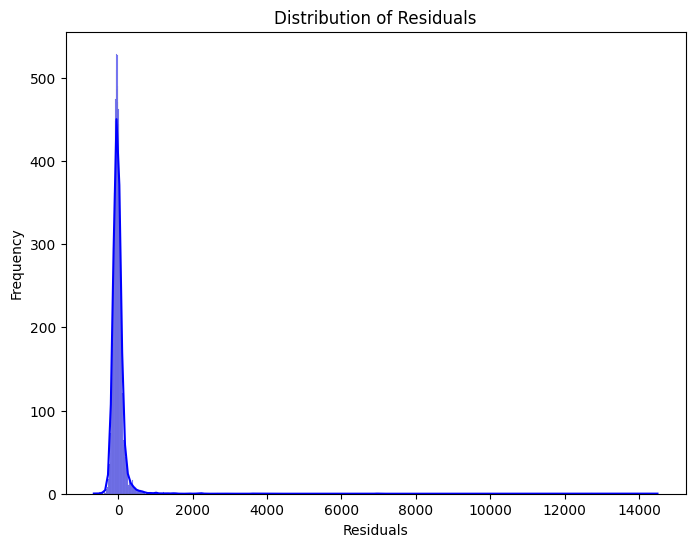

In [ ]:
residuals = y_test - y_pred_best
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


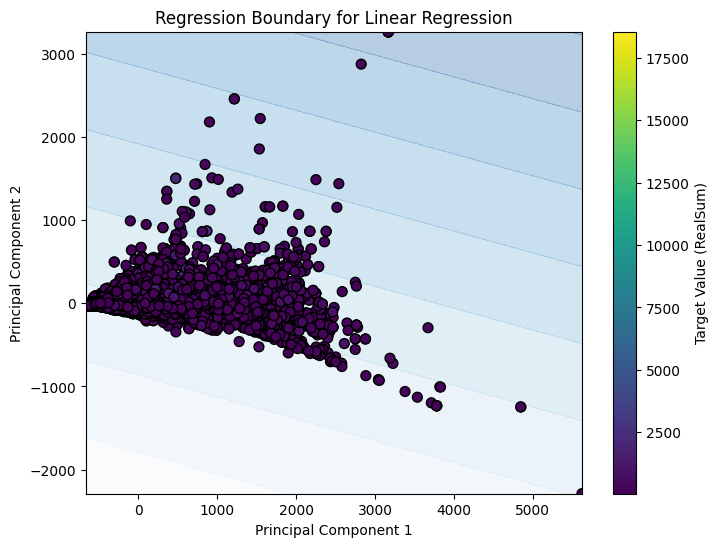

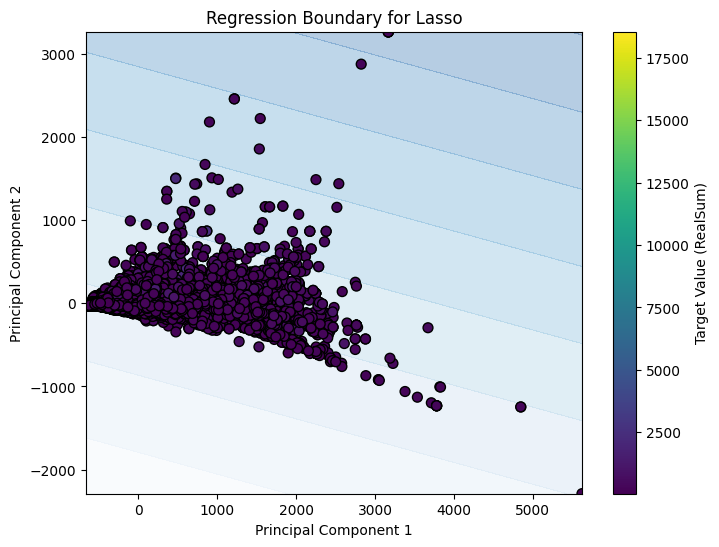

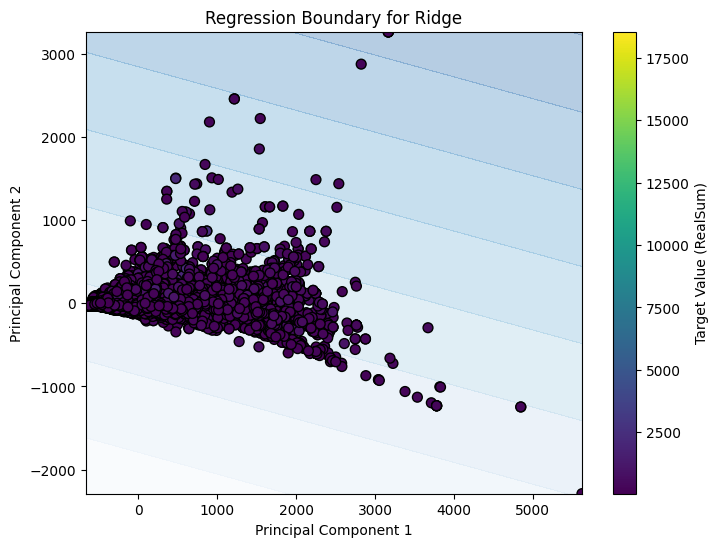

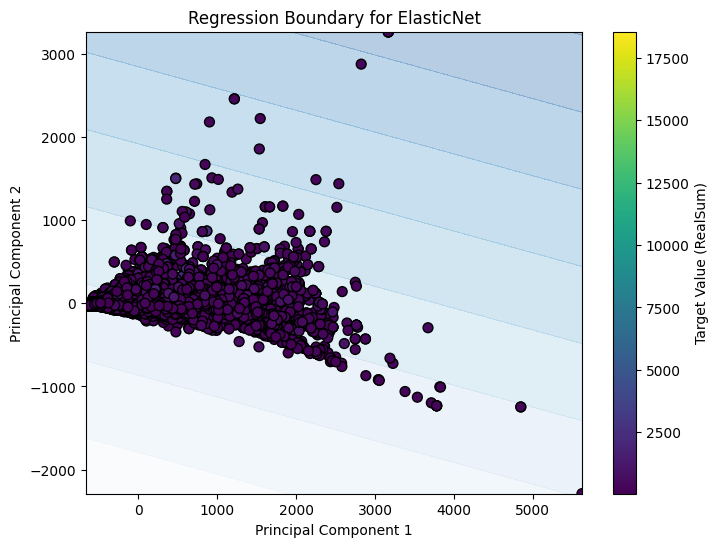

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the models
linear_regressor = LinearRegression()
lasso_regressor = Lasso(alpha=1.0)  # You can adjust alpha for Lasso regularization
ridge_regressor = Ridge(alpha=1.0)  # You can adjust alpha for Ridge regularization
elasticnet_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5)  # ElasticNet with equal mix of Lasso and Ridge

# Function to visualize regression boundary
def plot_regression_boundary(model, model_name, X_train, y_train, X_test, y_test):
    # Remove 'Cluster' column if it exists
    X_train_no_cluster = X_train.drop(columns=['Cluster'], errors='ignore')  # Remove 'Cluster' from X_train
    X_test_no_cluster = X_test.drop(columns=['Cluster'], errors='ignore')    # Remove 'Cluster' from X_test

    # Apply PCA to reduce data to 2 components
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train_no_cluster)
    X_test_pca = pca.transform(X_test_no_cluster)

    # Fit the model on the PCA-reduced data
    model.fit(X_train_pca, y_train)

    # Create a meshgrid to plot the decision boundary
    x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
    y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Make predictions across the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the data points and regression boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='Blues')  # Background color for regression boundary
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=50, edgecolor='k', cmap='viridis')
    plt.title(f"Regression Boundary for {model_name}")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar(label='Target Value (RealSum)')
    plt.show()

# Example of how to apply this function for each model (Linear Regression, Lasso, Ridge, ElasticNet)
plot_regression_boundary(linear_regressor, "Linear Regression", X_train, y_train, X_test, y_test)
plot_regression_boundary(lasso_regressor, "Lasso", X_train, y_train, X_test, y_test)
plot_regression_boundary(ridge_regressor, "Ridge", X_train, y_train, X_test, y_test)
plot_regression_boundary(elasticnet_regressor, "ElasticNet", X_train, y_train, X_test, y_test)


## NO PCA

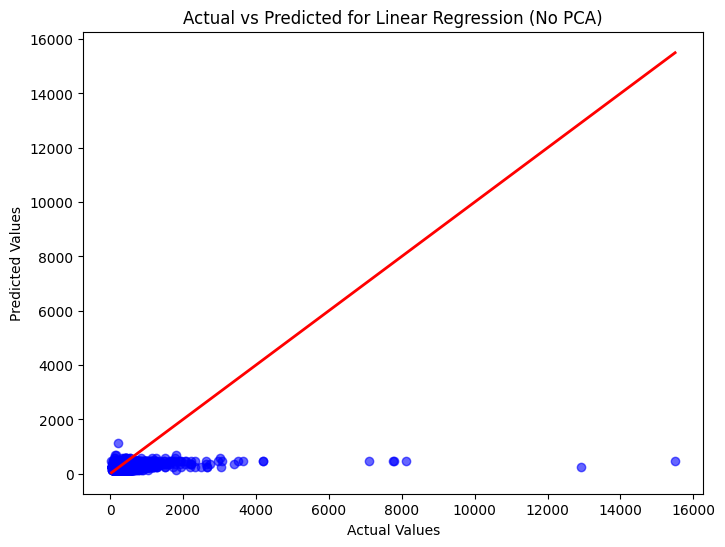

Linear Regression (No PCA) - MSE: 107641.37445180249, RMSE: 328.0874493969595, MAE: 145.0553960626653, R²: 0.05922515572658915


/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


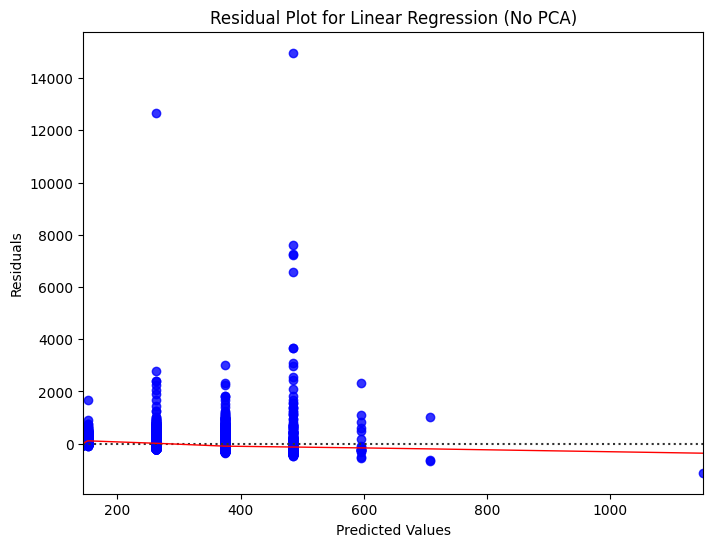

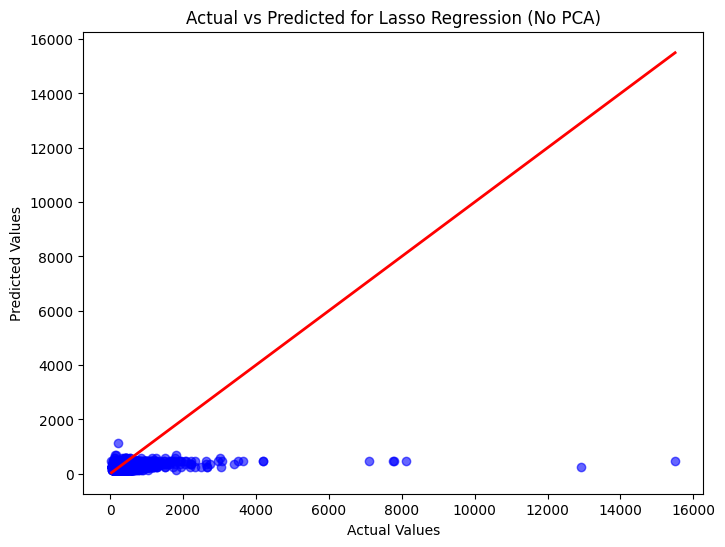

Lasso Regression (No PCA) - MSE: 107784.1317632014, RMSE: 328.3049371593449, MAE: 145.29025297131602, R²: 0.05797747110639384


/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


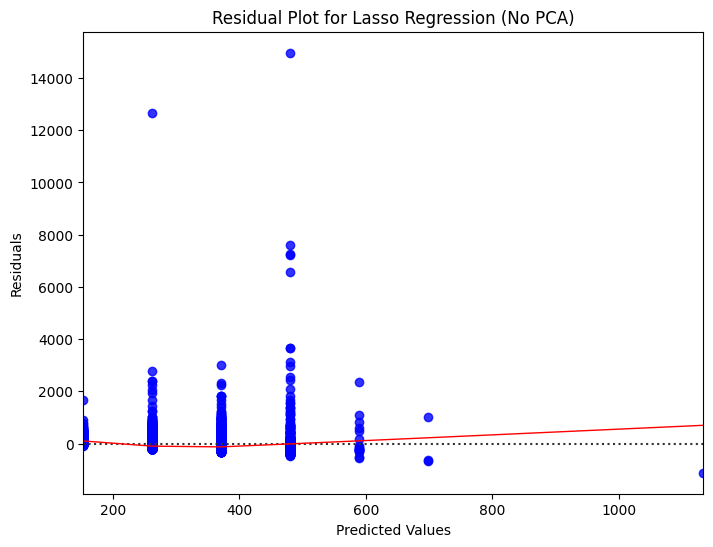

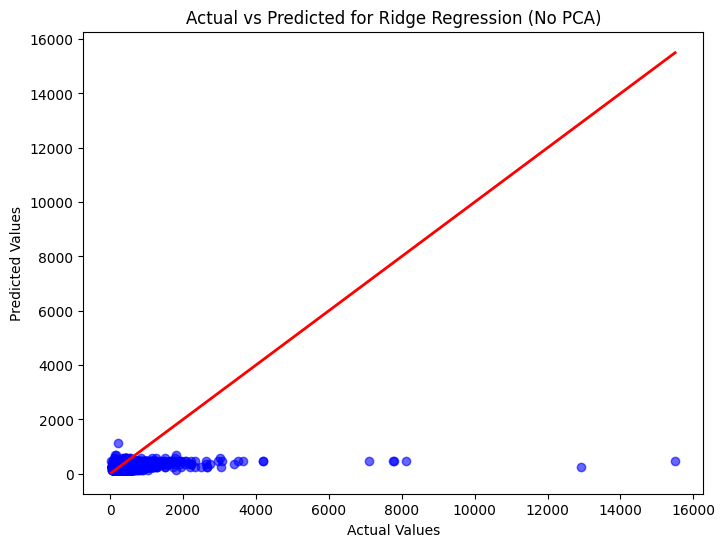

Ridge Regression (No PCA) - MSE: 107641.50459184252, RMSE: 328.08764772822906, MAE: 145.05511652655224, R²: 0.05922401831565849


/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


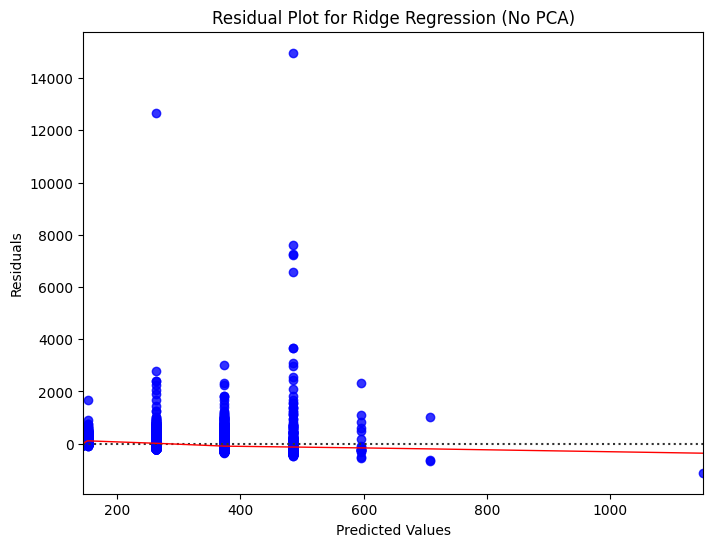

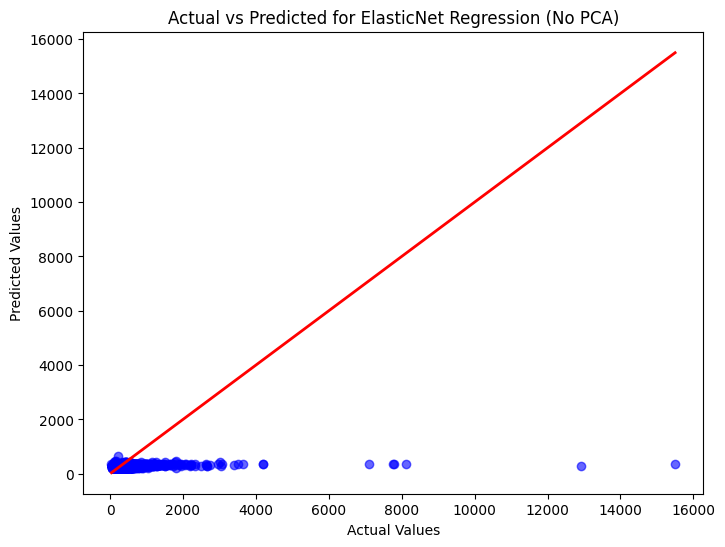

ElasticNet Regression (No PCA) - MSE: 110334.6136027352, RMSE: 332.16654497817086, MAE: 145.01446552862004, R²: 0.03568651497888775


/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


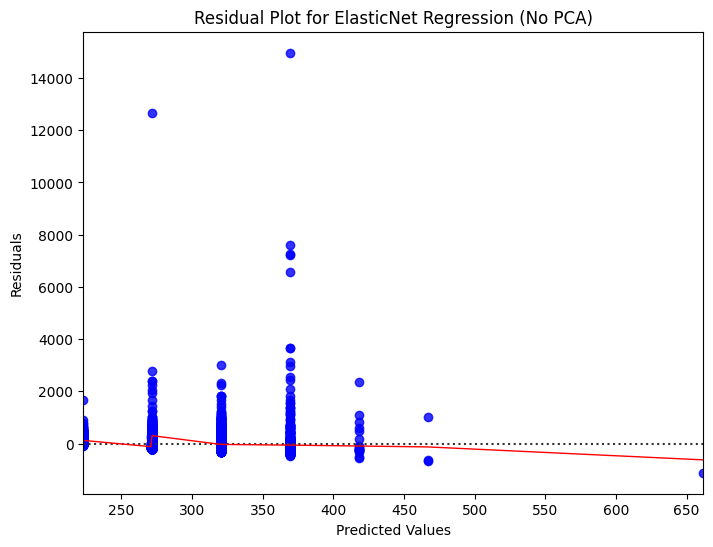

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the models
linear_regressor = LinearRegression()
lasso_regressor = Lasso(alpha=1.0)
ridge_regressor = Ridge(alpha=1.0)
elasticnet_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5)

# Function to train and visualize the regression boundary without PCA
def plot_regression_boundary_without_pca(model, model_name, X_train, X_test, y_train, y_test, feature1, feature2):
    # Select two features for plotting
    X_train_selected = X_train[[feature1, feature2]]
    X_test_selected = X_test[[feature1, feature2]]

    # Train the model
    model.fit(X_train_selected, y_train)

    # Make predictions
    y_pred = model.predict(X_test_selected)

    # Plot Actual vs Predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Ideal prediction line
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted for {model_name} (No PCA)')
    plt.show()

    # Print evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} (No PCA) - MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R²: {r2}")

    # Residual plot
    plt.figure(figsize=(8, 6))
    sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, color='blue', line_kws={'color': 'red', 'lw': 1})
    plt.title(f'Residual Plot for {model_name} (No PCA)')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()

# Choose two features for visualization (you can select different features here)
feature1 = 'room_shared'  # Example feature 1
feature2 = 'bedrooms'  # Example feature 2

# Train and evaluate each model without PCA and plot regression boundary
plot_regression_boundary_without_pca(linear_regressor, "Linear Regression", X_train, X_test, y_train, y_test, feature1, feature2)
plot_regression_boundary_without_pca(lasso_regressor, "Lasso Regression", X_train, X_test, y_train, y_test, feature1, feature2)
plot_regression_boundary_without_pca(ridge_regressor, "Ridge Regression", X_train, X_test, y_train, y_test, feature1, feature2)
plot_regression_boundary_without_pca(elasticnet_regressor, "ElasticNet Regression", X_train, X_test, y_train, y_test, feature1, feature2)


## Overfitting vs underfitting

Evaluating Models WITHOUT PCA...


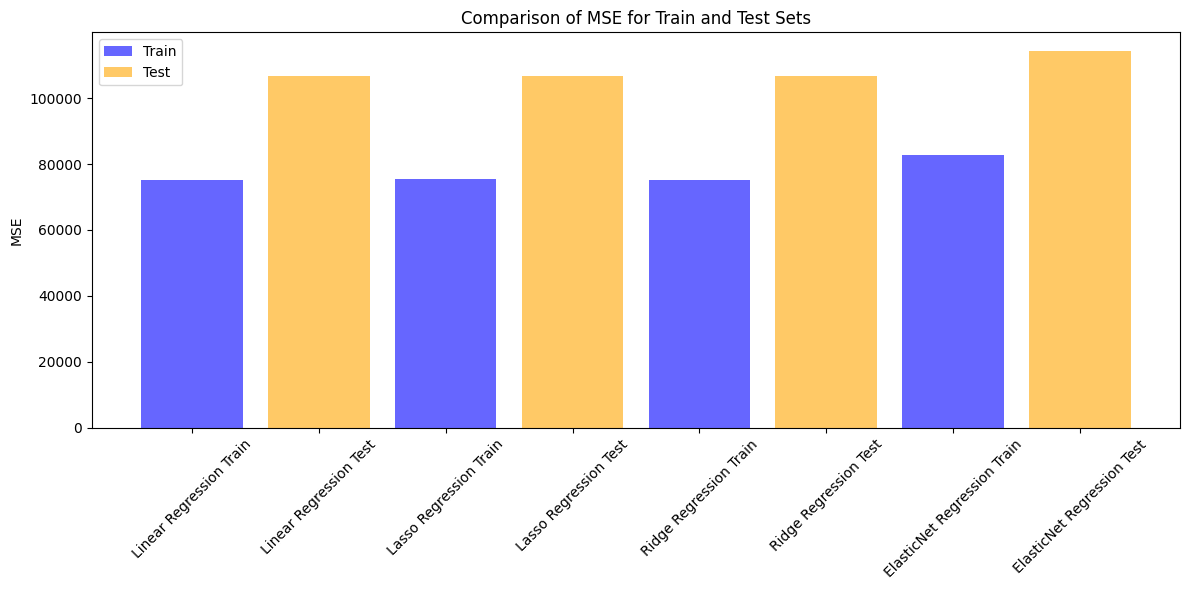

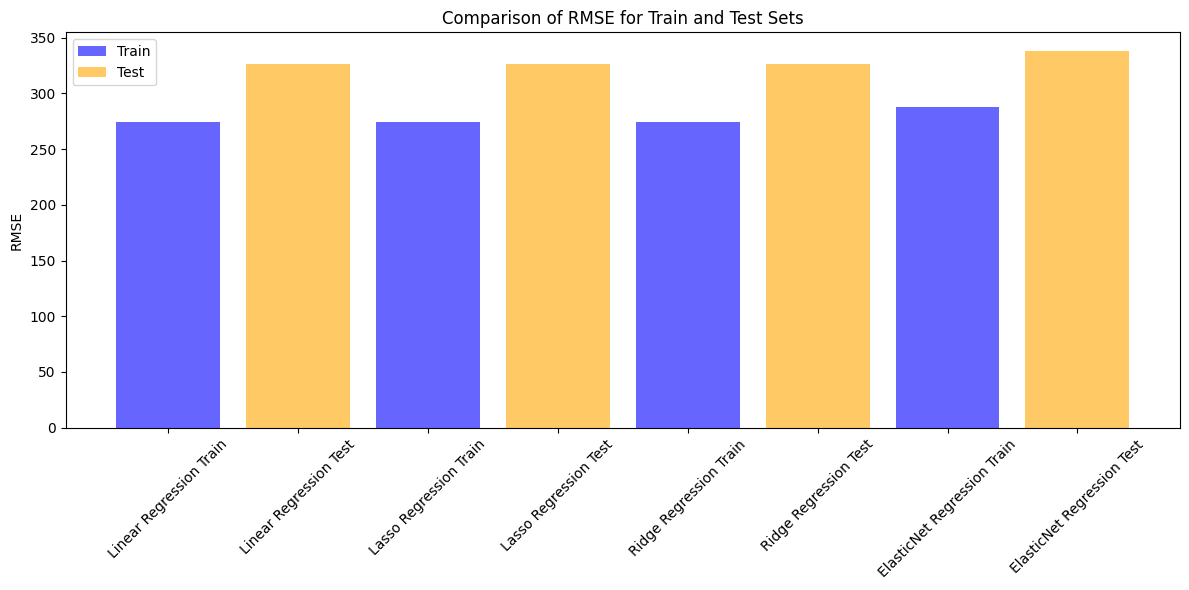

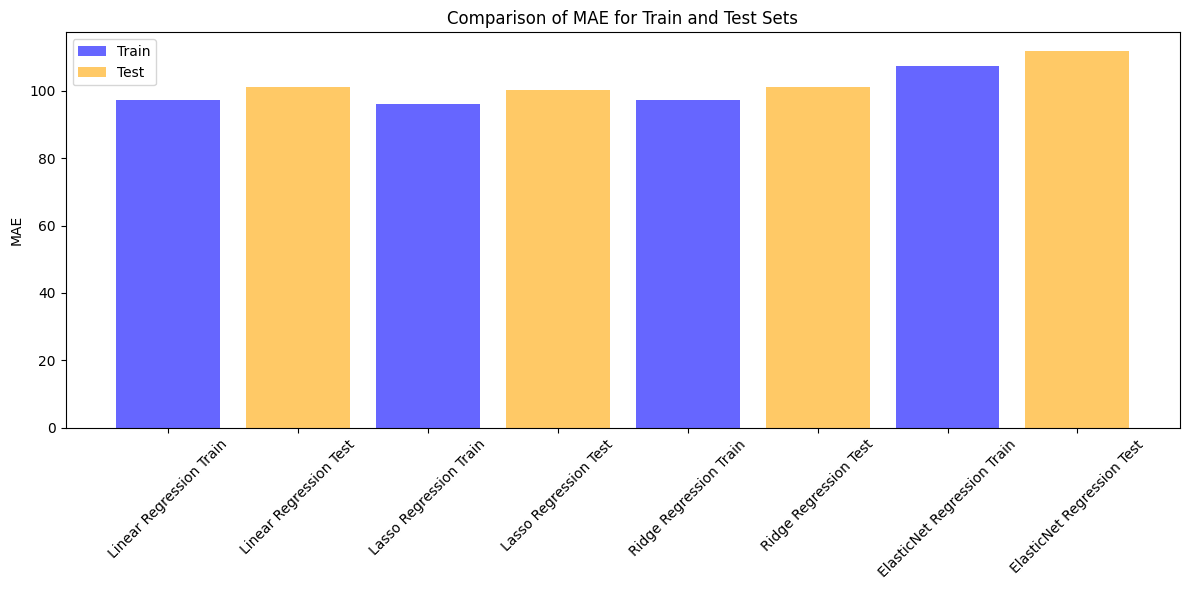

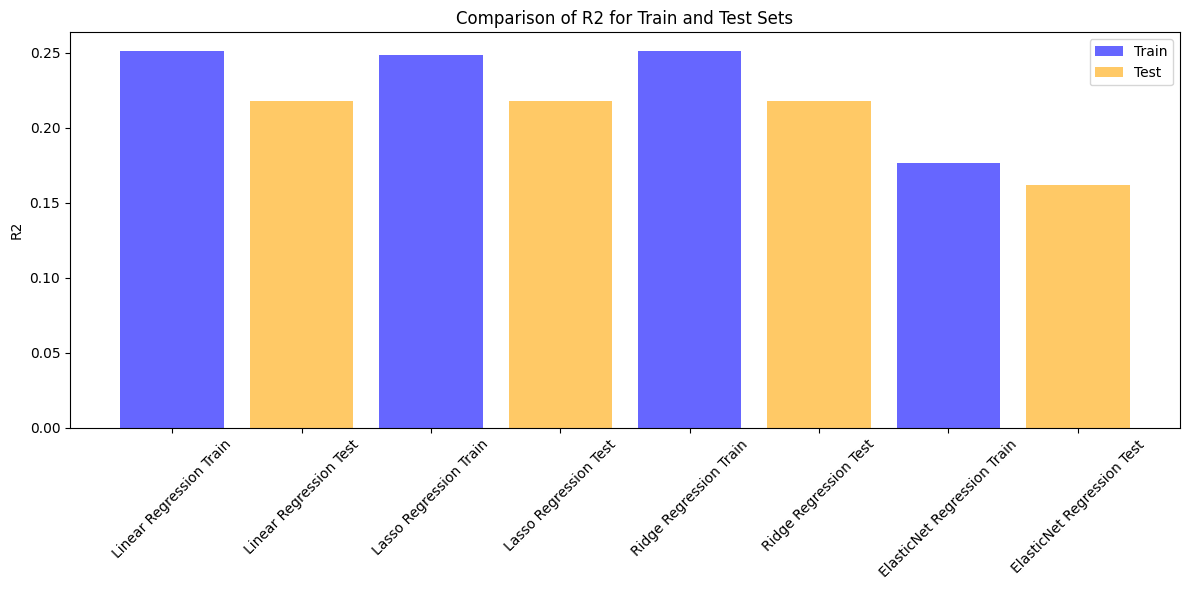


Evaluating Models WITH PCA (10 Components)...


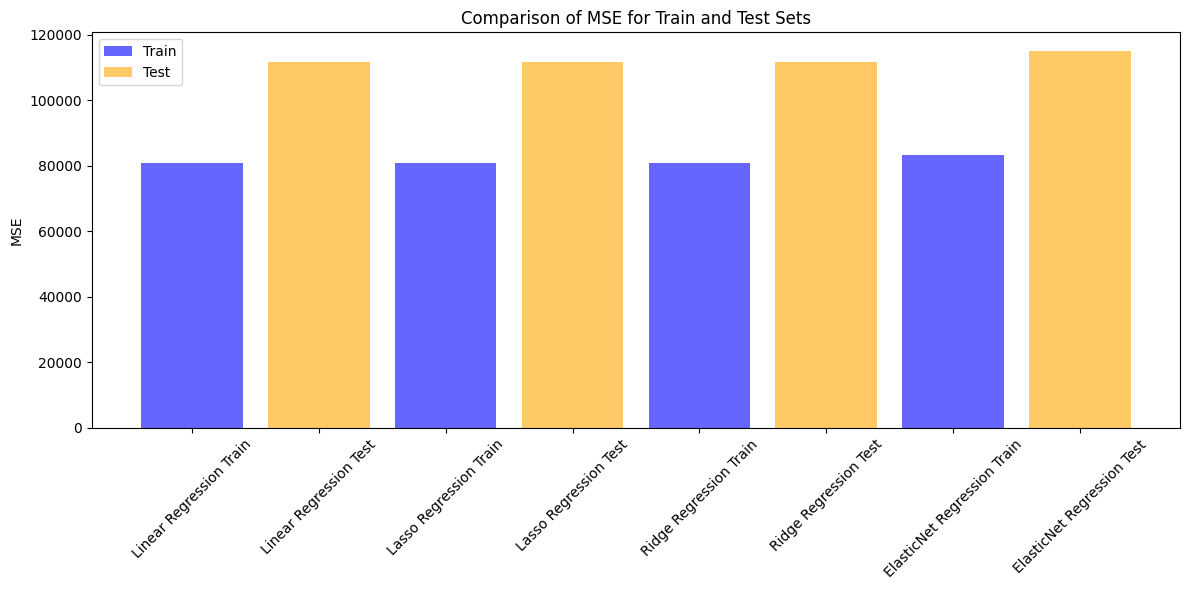

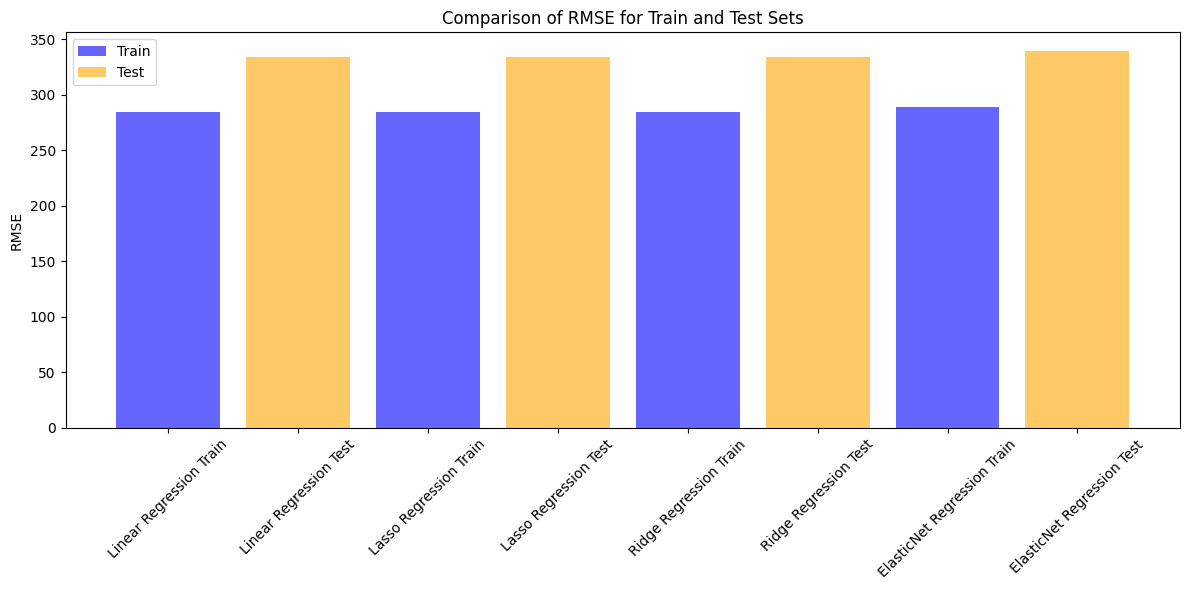

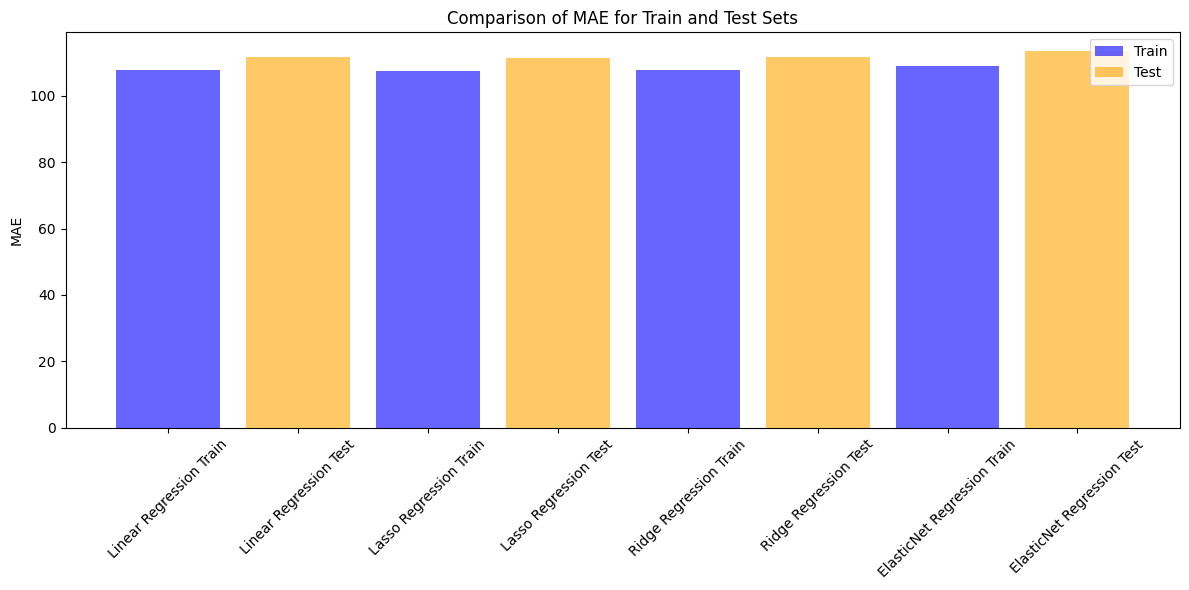

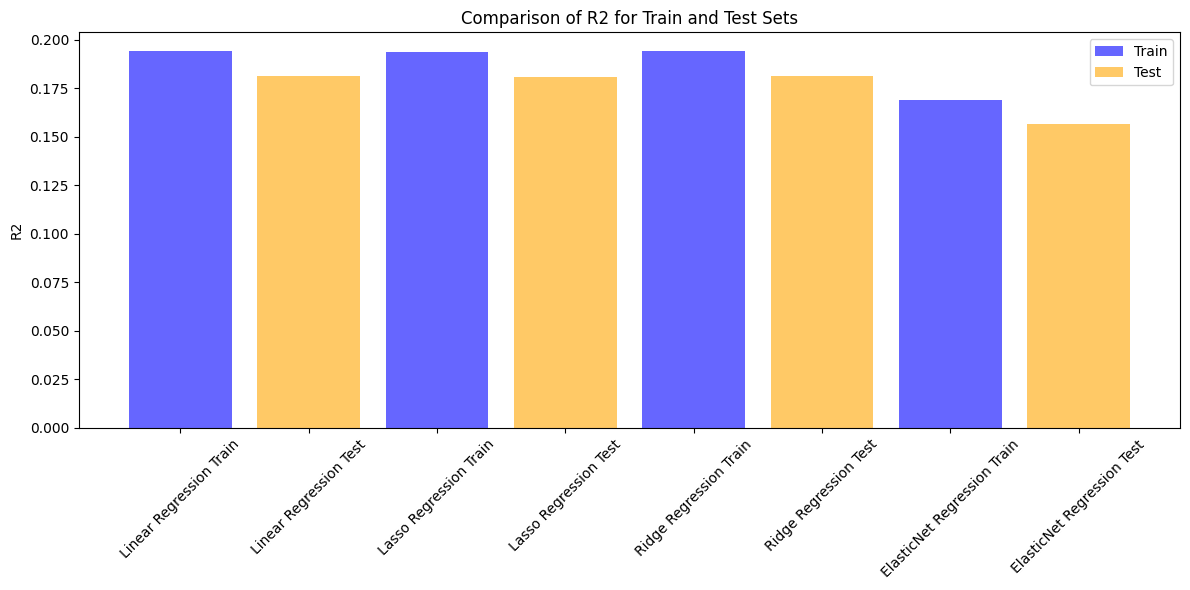


Comparison of Metrics (No PCA vs PCA):

Model: Linear Regression
  No PCA  - Train R²: 0.251, Test R²: 0.218
  With PCA - Train R²: 0.194, Test R²: 0.181
--------------------------------------------------
Model: Lasso Regression
  No PCA  - Train R²: 0.249, Test R²: 0.217
  With PCA - Train R²: 0.193, Test R²: 0.181
--------------------------------------------------
Model: Ridge Regression
  No PCA  - Train R²: 0.251, Test R²: 0.218
  With PCA - Train R²: 0.194, Test R²: 0.181
--------------------------------------------------
Model: ElasticNet Regression
  No PCA  - Train R²: 0.176, Test R²: 0.162
  With PCA - Train R²: 0.169, Test R²: 0.156
--------------------------------------------------


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to evaluate a model
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predictions for training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate training metrics
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Calculate test metrics
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    return {
        "model": model_name,
        "mse_train": mse_train,
        "rmse_train": rmse_train,
        "mae_train": mae_train,
        "r2_train": r2_train,
        "mse_test": mse_test,
        "rmse_test": rmse_test,
        "mae_test": mae_test,
        "r2_test": r2_test,
    }

# Function to plot results
def plot_results(results, metric):
    plt.figure(figsize=(12, 6))
    for result in results:
        plt.bar(
            result["model"] + " Train",
            result[f"{metric}_train"],
            color="blue",
            alpha=0.6,
            label="Train" if result["model"] + " Train" == results[0]["model"] + " Train" else ""
        )
        plt.bar(
            result["model"] + " Test",
            result[f"{metric}_test"],
            color="orange",
            alpha=0.6,
            label="Test" if result["model"] + " Test" == results[0]["model"] + " Test" else ""
        )
    plt.title(f"Comparison of {metric.upper()} for Train and Test Sets")
    plt.ylabel(metric.upper())
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Main function to run evaluation for all models
def run_evaluation(X_train, X_test, y_train, y_test, use_pca=False, n_components=None):
    # If PCA is applied
    if use_pca and n_components:
        pca = PCA(n_components=n_components)
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)

    # Initialize models
    models = [
        (LinearRegression(), "Linear Regression"),
        (Lasso(alpha=1.0), "Lasso Regression"),
        (Ridge(alpha=1.0), "Ridge Regression"),
        (ElasticNet(alpha=1.0, l1_ratio=0.5), "ElasticNet Regression")
    ]

    results = []

    # Evaluate each model
    for model, model_name in models:
        results.append(evaluate_model(model, model_name, X_train, X_test, y_train, y_test))

    # Plot results
    for metric in ["mse", "rmse", "mae", "r2"]:
        plot_results(results, metric)

    return results

# Run evaluation without PCA
print("Evaluating Models WITHOUT PCA...")
results_no_pca = run_evaluation(X_train_no_cluster, X_test_no_cluster, y_train, y_test)

# Run evaluation with PCA (10 components as an example)
print("\nEvaluating Models WITH PCA (10 Components)...")
results_pca = run_evaluation(X_train_no_cluster, X_test_no_cluster, y_train, y_test, use_pca=True, n_components=18)

# Compare results
def compare_results(results_no_pca, results_pca):
    print("\nComparison of Metrics (No PCA vs PCA):\n")
    for no_pca, pca in zip(results_no_pca, results_pca):
        print(f"Model: {no_pca['model']}")
        print(f"  No PCA  - Train R²: {no_pca['r2_train']:.3f}, Test R²: {no_pca['r2_test']:.3f}")
        print(f"  With PCA - Train R²: {pca['r2_train']:.3f}, Test R²: {pca['r2_test']:.3f}")
        print("-" * 50)

compare_results(results_no_pca, results_pca)
